In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (numpy.mean(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
sources["source_id"] = sources.index
sources = sources.ix[sources.cohort == "AOCS"]
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired
source_id,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,AOCS-034-13/SP101524,True
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False


In [3]:
mutations = pandas.read_csv("../data/mutations.csv.bz2", converters={'binding_peptides': eval})
mutations = mutations.ix[mutations.source_id.str.startswith("AOCS")]
mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
#mutations["interesting"] = (mutations.context_mutation_3p5p == "C(C>A)C").astype(float)
mutations["interesting"] = (mutations.context_mutation == "C>A").astype(float)

mutations["interesting"].mean()

muts_confident = mutations.ix[
    (mutations.called == 1) | (mutations.dna_alt_reads > 10)
]


In [4]:
sources["protein changing"] = muts_confident.ix[
    (mutations.effect.str.startswith("p."))
].groupby("source_id").donor.count().to_frame()["donor"]

sources["peptides"] = muts_confident.groupby("source_id").num_binders.sum().to_frame()["num_binders"]

sources["expressed peptides"] = muts_confident.ix[
    (muts_confident.rna_alt_reads > 2)
].groupby("source_id").num_binders.sum().to_frame()["num_binders"]


sources["mutations"] = muts_confident.groupby("source_id").donor.count().to_frame()["donor"]
sources["mutations_per_mb"] = sources.mutations * 1e6 / sources.library.map(library_sizes)

sources["indel"] = muts_confident.ix[
    muts_confident.indel
].groupby("source_id").donor.count().to_frame()["donor"]
sources.indel = sources.indel.fillna(0)

sources["interesting mutations"] = muts_confident.groupby("source_id").interesting.mean().to_frame()["interesting"] * 100.0

sources["group"] = sources.cohort + " " + sources.tissue_type
sources["treatment"] = sources.treated.map({True: "chemo treated", False: "treatment naive"})

sources["fraction_peptides_expressed"] = sources["expressed peptides"] / sources["peptides"]


sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False,48,124,71,5818,1.938041,1,18.631832,AOCS solid,treatment naive,0.572581
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False,11,32,NaN,1520,0.506329,0,17.236842,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False,57,58,20,6670,2.221852,1,16.446777,AOCS solid,treatment naive,0.344828
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False,39,61,39,5643,1.879747,2,15.435052,AOCS solid,treatment naive,0.639344
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,AOCS-034-13/SP101524,True,122,266,135,13340,4.443704,5,17.376312,AOCS ascites,chemo treated,0.507519
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True,73,168,65,6811,2.268821,4,17.970929,AOCS solid,treatment naive,0.386905
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False,114,177,91,14988,4.992672,0,11.182279,AOCS solid,treatment naive,0.514124
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False,56,150,16,7012,2.335776,1,20.593269,AOCS solid,treatment naive,0.106667
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False,42,146,NaN,6070,2.021985,5,19.126853,AOCS solid,treatment naive,NaN


In [5]:
mutations[mutations.source_id == "AOCS-090-13/SP101618"]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,interesting


In [6]:
muts_confident.ix[muts_confident.source_id == "AOCS-090-13/SP101618"]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,interesting


In [7]:
sources.ix[pandas.isnull(sources.mutations)]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,


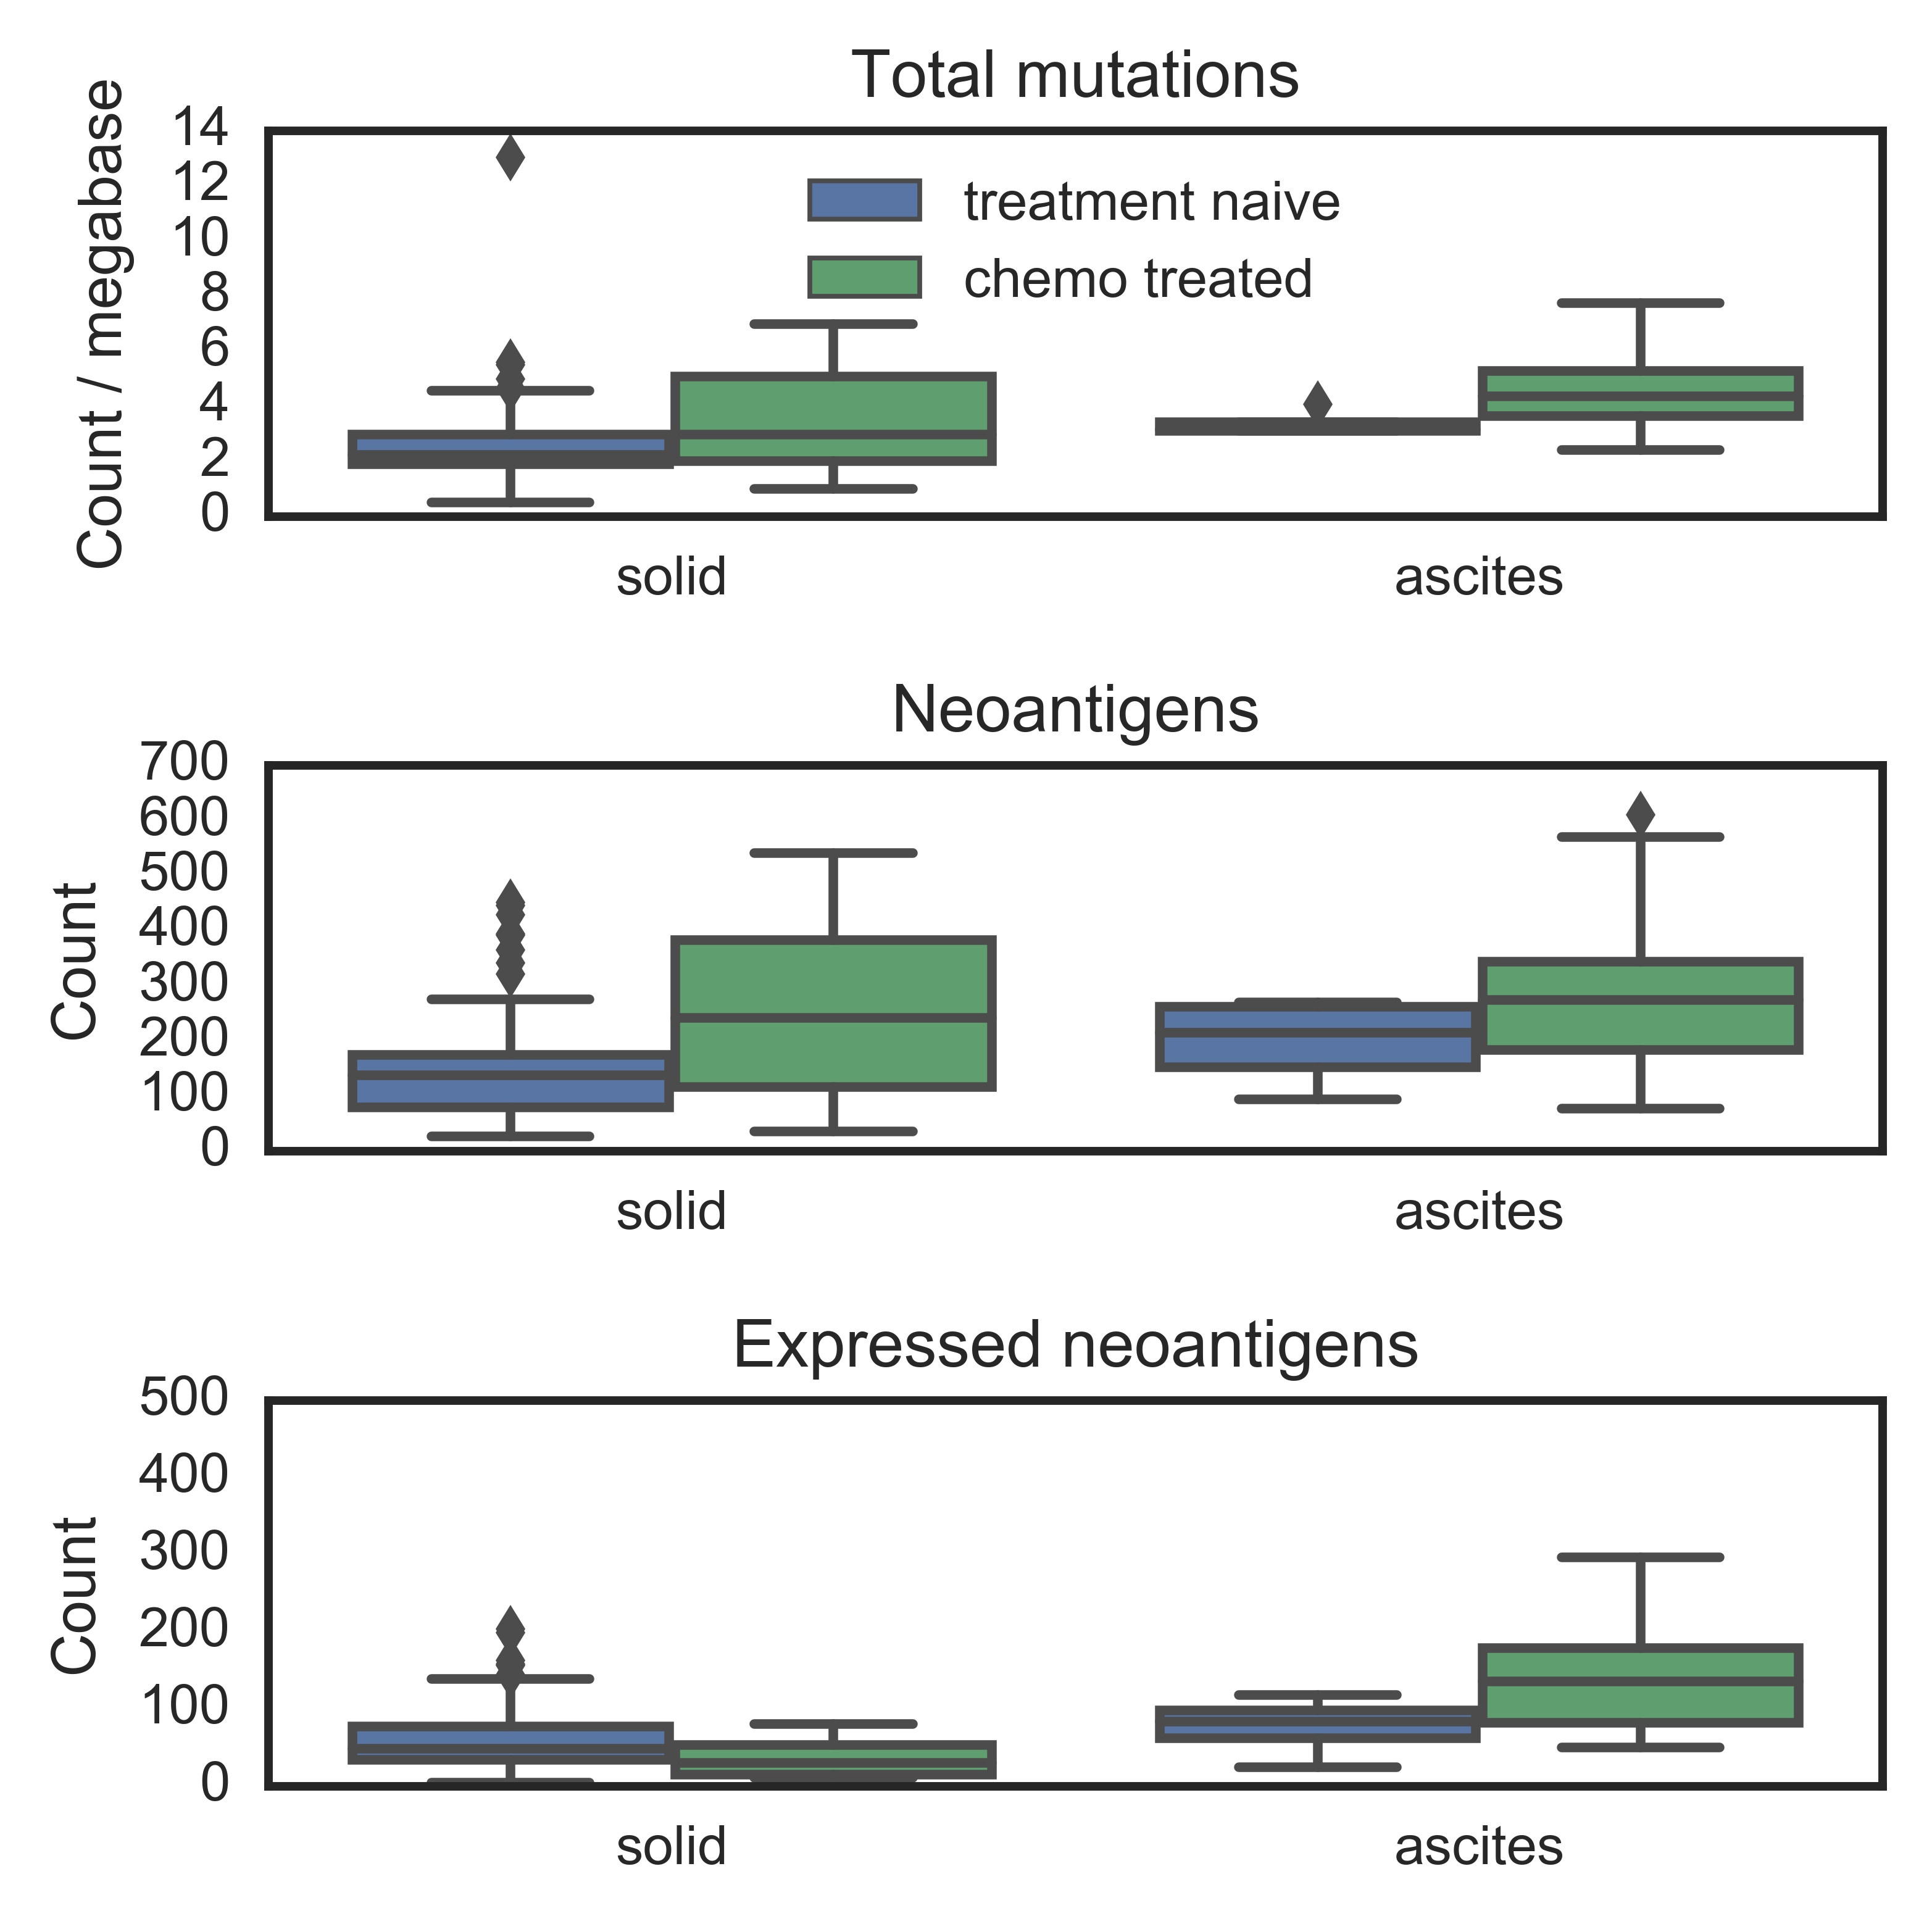

In [8]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)

seaborn.set_context("paper")
seaborn.set_style("white")

pyplot.figure(figsize=(4,4))
grid=(3,1)
i = 0

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
#pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="tissue_type", y="mutations_per_mb", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.legend(loc="upper center")
pyplot.title("Total mutations")
pyplot.ylabel("Count / megabase")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
#pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="tissue_type", y="peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
#pyplot.legend(loc="upper right")
pyplot.title("Neoantigens")
pyplot.ylabel("Count")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0))
#pyplot.title("Expressed mutations")
#pyplot.title("B", loc="left")
#sub_data = sources[sources.cohort != "TCGA"]
sub_data = sources
seaborn.boxplot(data=sub_data, x="tissue_type", y="expressed peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.title("Expressed neoantigens")
pyplot.ylabel("Count")
pyplot.ylim(ymin=0, ymax=500)
i += 1

'''
ax = pyplot.subplot2grid(grid,(i, 0))
pyplot.title("C", loc="left")
seaborn.boxplot(data=sources, x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.tight_layout()
pyplot.title("percent C>A")
pyplot.ylabel("")
i += 1
'''
pyplot.tight_layout()

pyplot.savefig("../figures/fig1.pdf")


In [9]:
(sources.ix[sources.cohort == "AOCS"].peptides / sources.ix[sources.cohort == "AOCS"].mutations).sort(inplace=False)

source_id
AOCS-083-1/SP101592     0.004145
AOCS-092-13/SP101630    0.004943
AOCS-092-1/SP101628     0.005539
AOCS-144-1/SP101951     0.007098
AOCS-107-1/SP101674     0.007635
AOCS-113-1/SP101694     0.007754
AOCS-169-1/SP102168     0.008094
AOCS-155-13/SP102045    0.008363
AOCS-004-1/SP101519     0.008696
AOCS-160-1/SP102084     0.009020
AOCS-170-1/SP102174     0.009916
AOCS-170-12/SP102177    0.010044
AOCS-105-1/SP101666     0.010172
AOCS-157-1/SP102055     0.010688
AOCS-005-1/SP101521     0.010810
AOCS-159-1/SP102074     0.010824
AOCS-059-1/SP101536     0.010939
AOCS-166-1/SP102133     0.011402
AOCS-055-1/SP101526     0.011809
AOCS-162-1/SP102096     0.011964
AOCS-084-1/SP101596     0.012651
AOCS-061-1/SP101544     0.012695
AOCS-096-1/SP101654     0.013229
AOCS-115-1/SP101708     0.013516
AOCS-149-1/SP102000     0.013821
AOCS-123-1/SP101756     0.014016
AOCS-112-1/SP101690     0.014120
AOCS-126-1/SP101785     0.014320
AOCS-131-1/SP101815     0.014465
AOCS-090-1/SP101616     0.014529


In [10]:
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False,48,124,71,5818,1.938041,1,18.631832,AOCS solid,treatment naive,0.572581
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False,11,32,NaN,1520,0.506329,0,17.236842,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False,57,58,20,6670,2.221852,1,16.446777,AOCS solid,treatment naive,0.344828
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False,39,61,39,5643,1.879747,2,15.435052,AOCS solid,treatment naive,0.639344
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,AOCS-034-13/SP101524,True,122,266,135,13340,4.443704,5,17.376312,AOCS ascites,chemo treated,0.507519
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True,73,168,65,6811,2.268821,4,17.970929,AOCS solid,treatment naive,0.386905
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False,114,177,91,14988,4.992672,0,11.182279,AOCS solid,treatment naive,0.514124
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False,56,150,16,7012,2.335776,1,20.593269,AOCS solid,treatment naive,0.106667
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False,42,146,NaN,6070,2.021985,5,19.126853,AOCS solid,treatment naive,NaN


In [11]:
sources.ix[sources.donor == "AOCS-077"]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-077-1/SP101572,AOCS-077,AOCS,WGS,True,primary,False,solid,75,WGS,False,AOCS-077-1/SP101572,False,37,85,16,3053,1.016989,2,16.344579,AOCS solid,chemo treated,0.188235


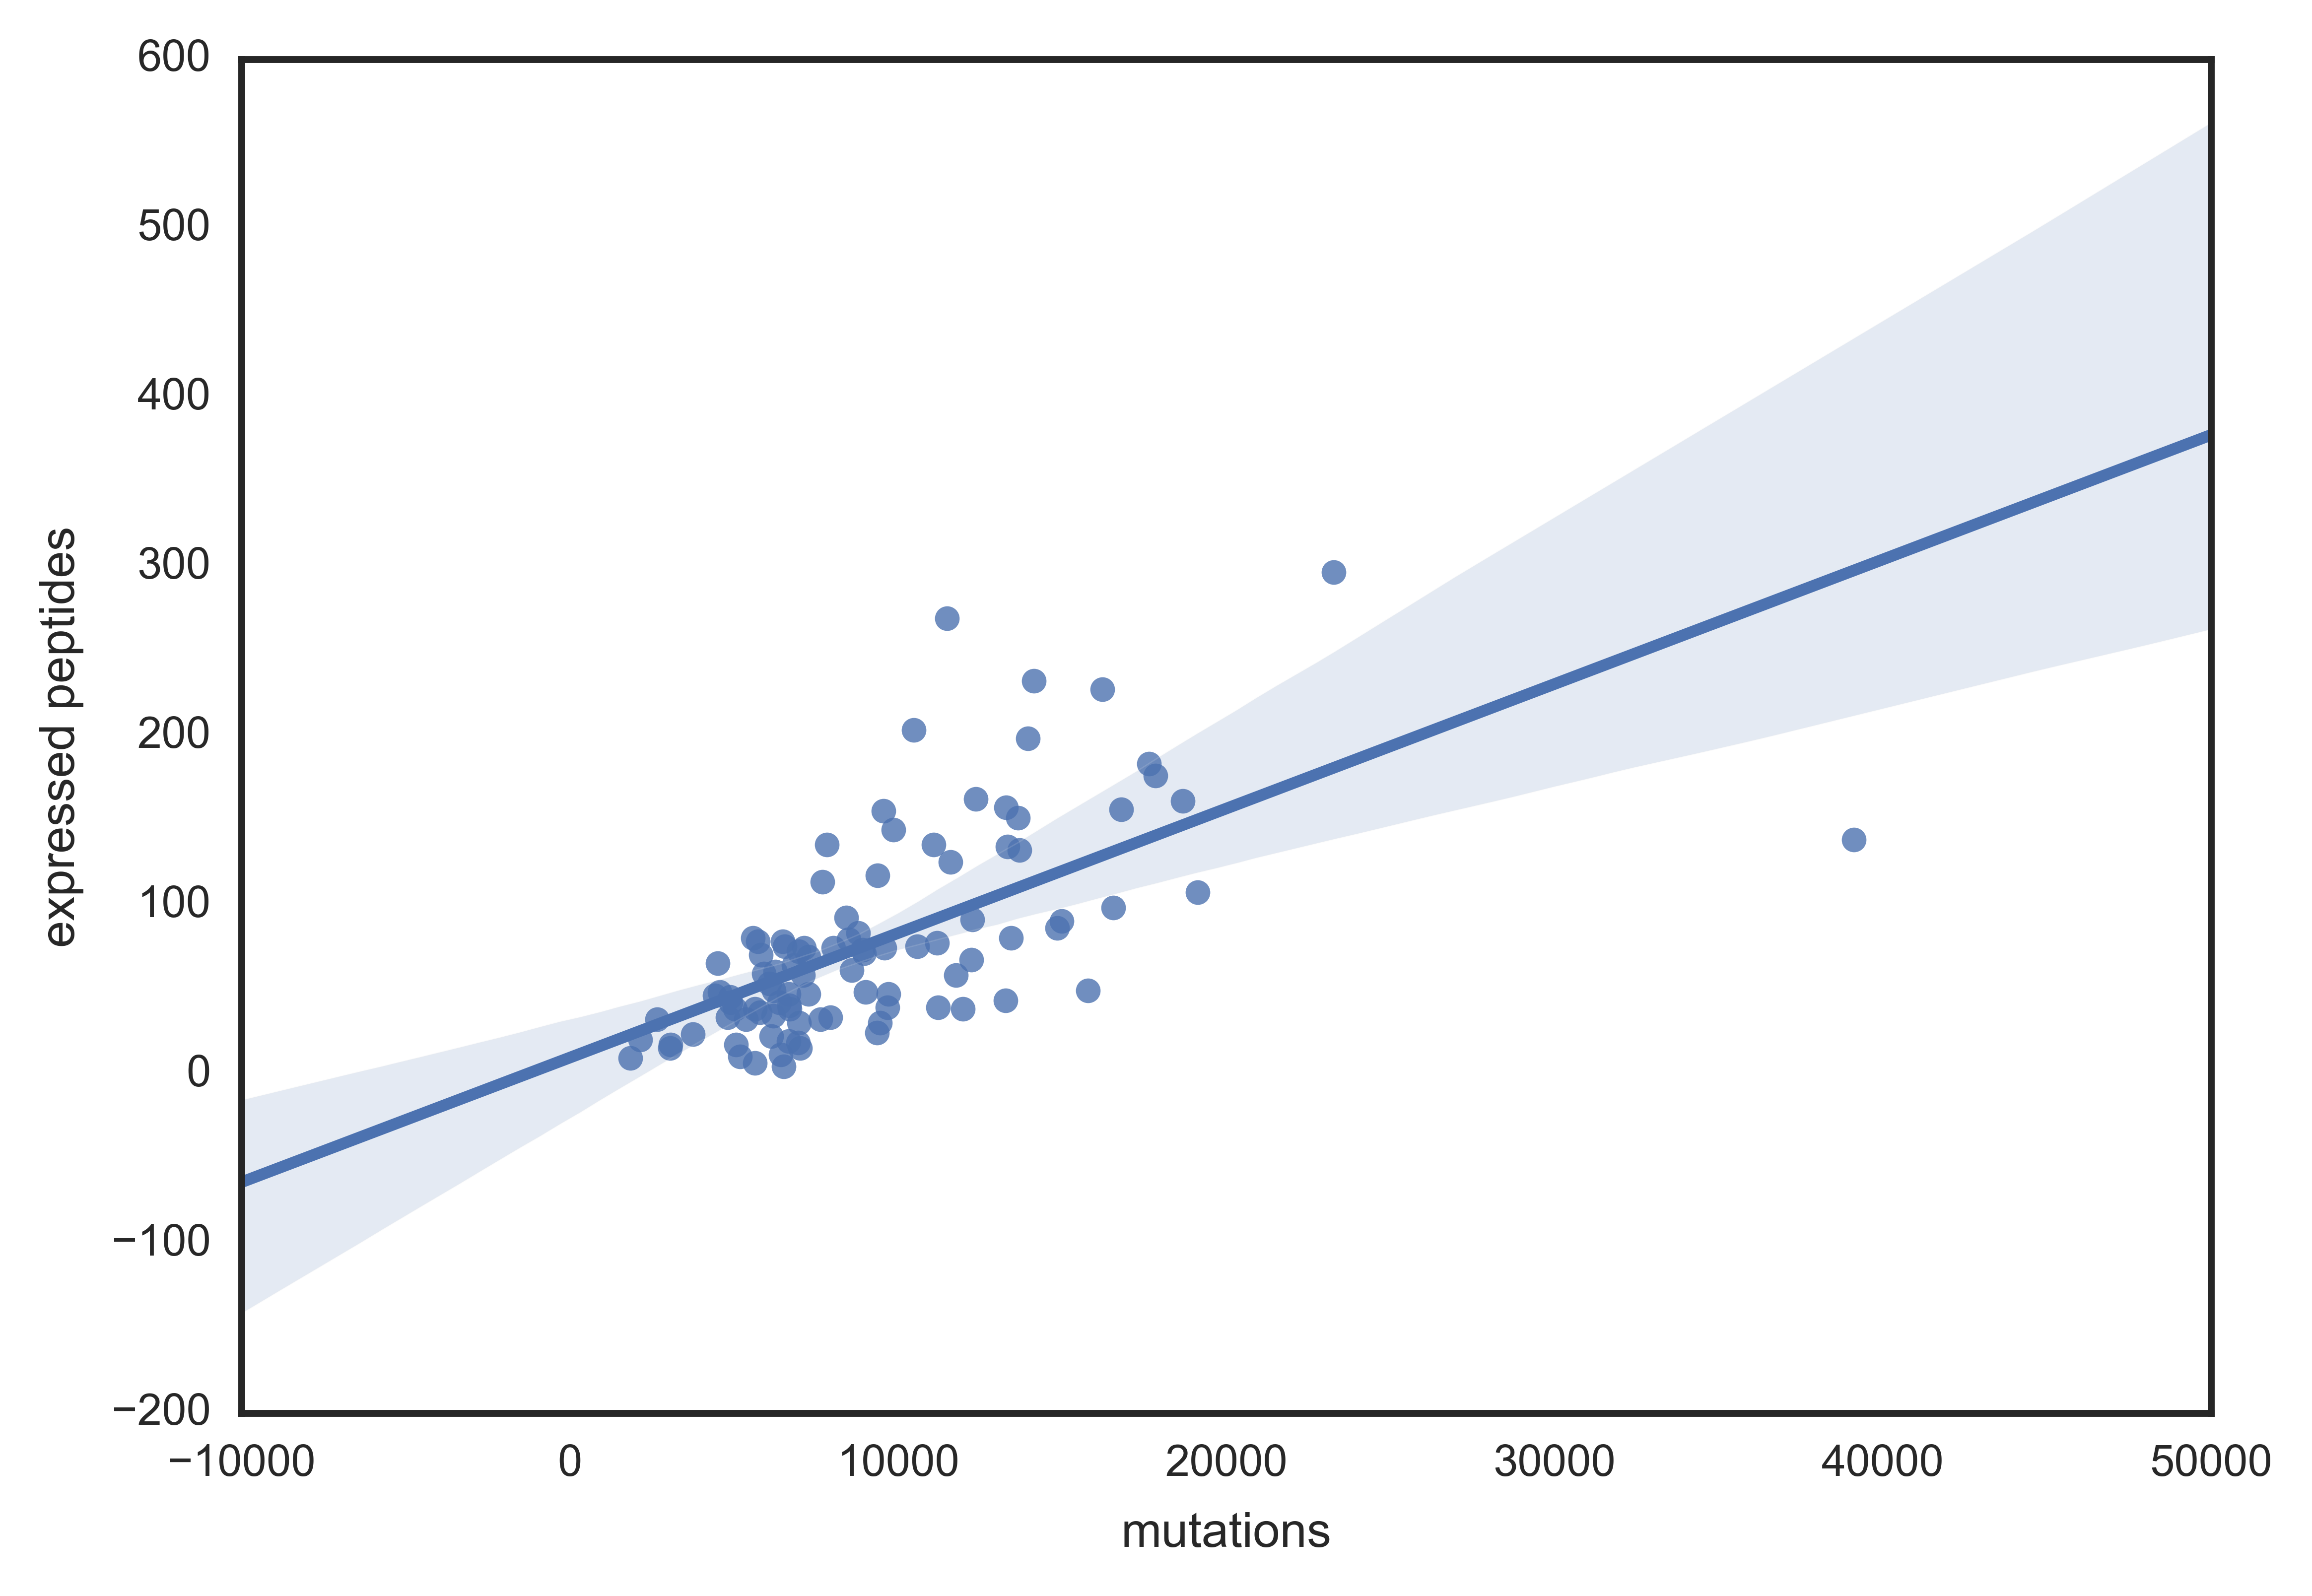

In [12]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"]["expressed peptides"])

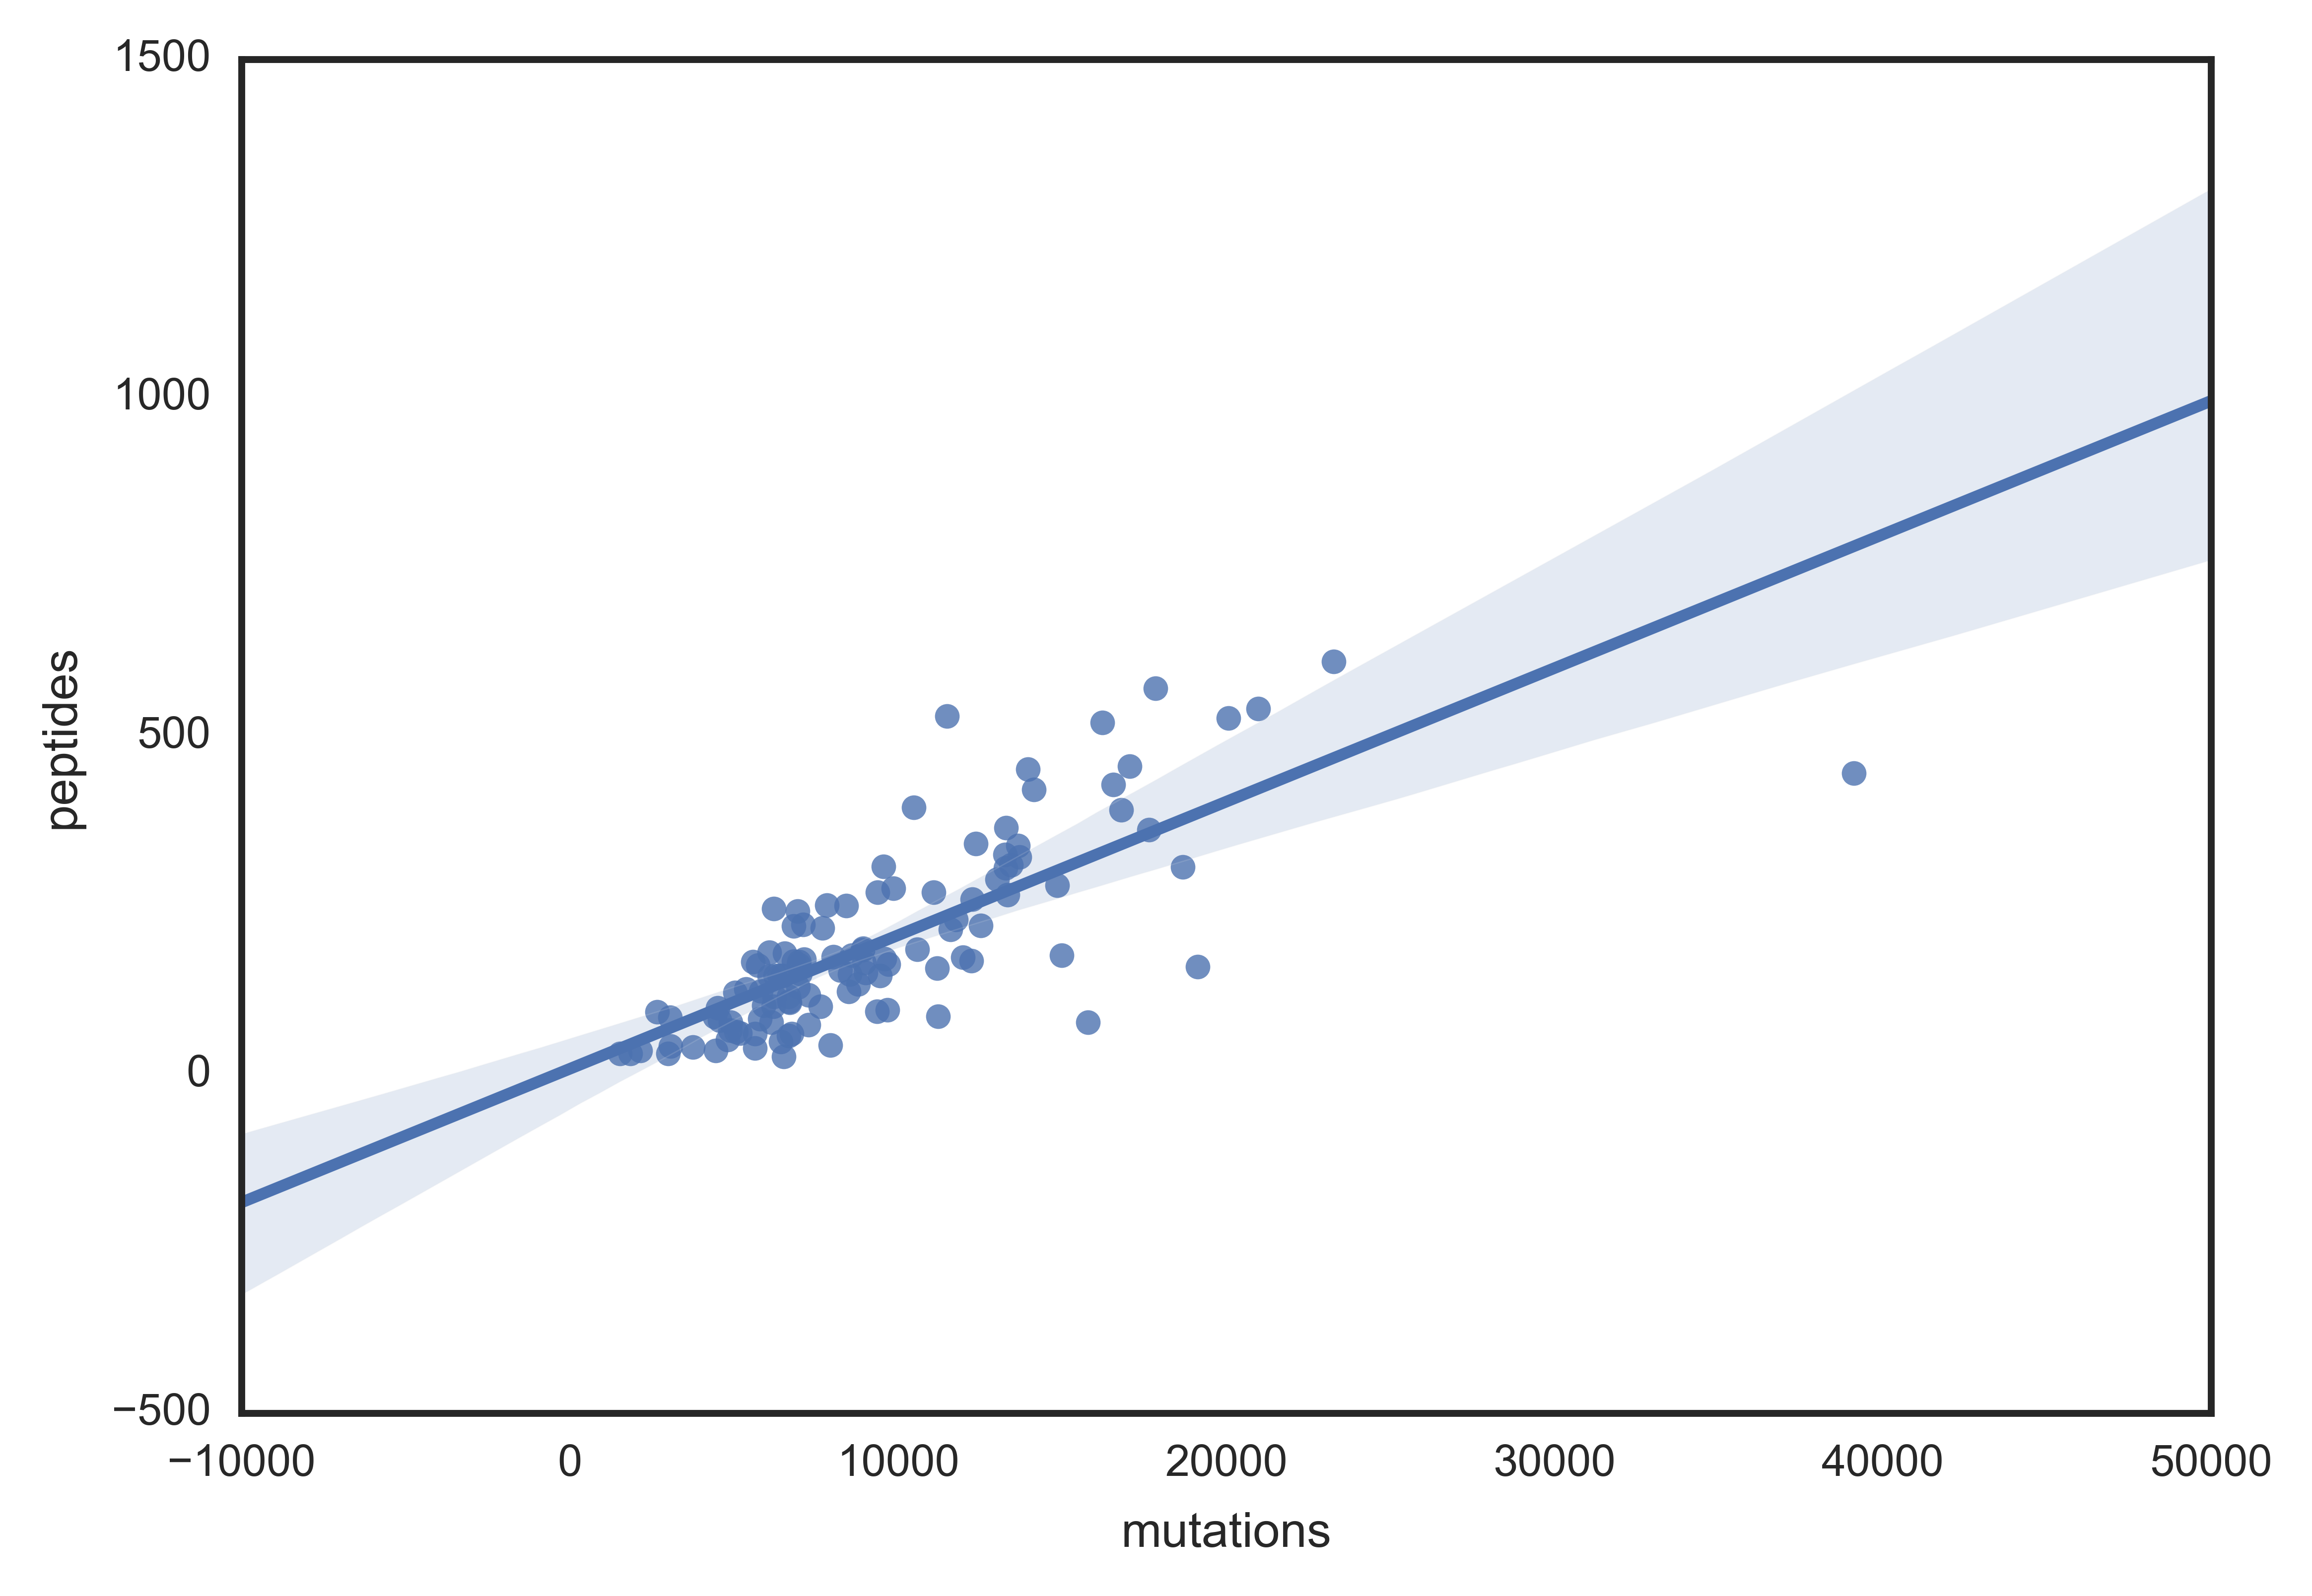

In [13]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"].peptides)

In [14]:
aocs_sources = sources.ix[sources.cohort == "AOCS"]

In [15]:
muts_confident.ix[1076674]

source_id                  AOCS-080-1/SP101584
donor                                 AOCS-080
called                                       1
genome                                  GRCh37
contig                                      18
interbase_start                       11372298
interbase_end                         11372299
ref                                          C
alt                                          A
effect                   non-coding-transcript
gene                             RP11-128P17.2
context_5_prime                TCCTAGGTTTGTTTT
context_3_prime                CACTACTTTTTTACA
context_mutation                           C>A
dna_alt_reads                              NaN
dna_ref_reads                              NaN
dna_total_reads                            NaN
rna_alt_reads                              NaN
rna_ref_reads                              NaN
rna_total_reads                            NaN
vaf                                        NaN
any_alt_reads

In [16]:
aocs_muts = mutations.ix[mutations.donor.str.startswith("AOCS")]
aocs_muts_confident = muts_confident.ix[muts_confident.donor.str.startswith("AOCS")]
aocs_muts_confident_coding = aocs_muts_confident.ix[aocs_muts_confident.effect.str.startswith("p.")]
aocs_muts_confident_coding_expressed = aocs_muts_confident_coding.ix[aocs_muts_confident_coding.rna_alt_reads > 2]

non_exon_effects = [
    "intergenic",
    "intragenic",
    "intronic",
    "non-coding-transcript",
    "incomplete",
    "splice-acceptor",
    "splice-donor",
    "intronic-splice-site",
    "exonic-splice-site",
    "3' UTR",
    "5' UTR",
]

aocs_muts_confident_exon = aocs_muts_confident.ix[~ aocs_muts_confident.effect.isin(non_exon_effects)]
aocs_muts_exon = aocs_muts.ix[~ aocs_muts.effect.isin(non_exon_effects)]

[x for x in aocs_muts_confident_exon.effect.unique().tolist() if not x.startswith("p.")]

['silent']

In [17]:
treated_sources = set(sources.index[sources.treated])
len(treated_sources)

35

In [18]:
paired_treated_sources = set(sources.index[sources.treated & sources.paired])

In [19]:
sources_with_unique_to_treated = set(mutations.ix[mutations.unique_to_treated].source_id.unique())

In [20]:
sub_exon = aocs_muts_confident_exon.ix[~ aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    183      5.289617    968          0.078431      0.026805
      True     252      5.420635   1366          0.110679      0.036912
True  False   6392      1.565707  10008          0.810890      0.936282

In [21]:
sub_exon = aocs_muts_confident_exon.ix[aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False    111      8.054054   894          0.089642      0.023542
      True     160      5.593750   895          0.089742      0.033934
True  False   4444      1.841584  8184          0.820616      0.942524

In [22]:
group_sum = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    294      6.333333   1862          0.083442      0.025472
      True     412      5.487864   2261          0.101322      0.035696
True  False  10836      1.678848  18192          0.815236      0.938832

In [23]:
group_sum = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    294      6.333333   1862          0.083442      0.033213
      True     412      5.487864   2261          0.101322      0.046543
True  False   8146      2.233243  18192          0.815236      0.920244

In [24]:
group_sum = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     88      5.715909   503          0.065130      0.025229
      True      51      4.470588   228          0.029522      0.014622
True  False   3349      2.087787  6992          0.905348      0.960149

In [25]:
(muts_confident.ix[(muts_confident.donor == "AOCS-077") & (muts_confident.num_binders > 500)])

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,interesting


In [26]:
(muts_confident.ix[muts_confident.donor.str.startswith("AOCS")].num_binders).describe()

count    1077986.000000
mean           0.020716
std            0.410662
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max           73.000000
Name: num_binders, dtype: float64

In [27]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-094-2/SP106641,AOCS-094,AOCS,WGS,True,recurrence,False,solid,758,WGS,True,AOCS-094-2/SP106641,True,127,310,81,13436,4.475683,10,17.862459,AOCS solid,chemo treated,0.26129
AOCS-139-4/SP101906,AOCS-139,AOCS,WGS,True,recurrence,False,solid,920,WGS,True,AOCS-139-4/SP101906,True,187,541,NaN,20973,6.986342,11,21.365565,AOCS solid,chemo treated,NaN
AOCS-139-17/SP101901,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,AOCS-139-17/SP101901,True,152,456,NaN,17058,5.682212,13,19.439559,AOCS solid,chemo treated,NaN
AOCS-139-16/SP101896,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,AOCS-139-16/SP101896,True,181,527,NaN,20064,6.683544,9,21.002791,AOCS solid,chemo treated,NaN
AOCS-167-4/SP102151,AOCS-167,AOCS,WGS,True,recurrence,False,solid,937,WGS,False,AOCS-167-4/SP102151,False,69,187,NaN,8934,2.976016,2,18.535930,AOCS solid,chemo treated,NaN
AOCS-167-16/SP102148,AOCS-167,AOCS,WGS,True,recurrence,True,solid,937,WGS,False,AOCS-167-16/SP102148,False,60,149,NaN,8520,2.838108,3,19.483568,AOCS solid,chemo treated,NaN


In [28]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "primary")]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False,48,124,71,5818,1.938041,1,18.631832,AOCS solid,treatment naive,0.572581
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False,11,32,NaN,1520,0.506329,0,17.236842,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False,57,58,20,6670,2.221852,1,16.446777,AOCS solid,treatment naive,0.344828
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False,39,61,39,5643,1.879747,2,15.435052,AOCS solid,treatment naive,0.639344
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True,73,168,65,6811,2.268821,4,17.970929,AOCS solid,treatment naive,0.386905
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False,114,177,91,14988,4.992672,0,11.182279,AOCS solid,treatment naive,0.514124
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False,56,150,16,7012,2.335776,1,20.593269,AOCS solid,treatment naive,0.106667
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False,42,146,NaN,6070,2.021985,5,19.126853,AOCS solid,treatment naive,NaN
AOCS-058-1/SP101532,AOCS-058,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-058-1/SP101532,False,84,151,49,9014,3.002665,8,22.786776,AOCS solid,treatment naive,0.324503


In [29]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-094-2/SP106641,AOCS-094,AOCS,WGS,True,recurrence,False,solid,758,WGS,True,AOCS-094-2/SP106641,True,127,310,81,13436,4.475683,10,17.862459,AOCS solid,chemo treated,0.26129
AOCS-139-4/SP101906,AOCS-139,AOCS,WGS,True,recurrence,False,solid,920,WGS,True,AOCS-139-4/SP101906,True,187,541,NaN,20973,6.986342,11,21.365565,AOCS solid,chemo treated,NaN
AOCS-139-17/SP101901,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,AOCS-139-17/SP101901,True,152,456,NaN,17058,5.682212,13,19.439559,AOCS solid,chemo treated,NaN
AOCS-139-16/SP101896,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,AOCS-139-16/SP101896,True,181,527,NaN,20064,6.683544,9,21.002791,AOCS solid,chemo treated,NaN
AOCS-167-4/SP102151,AOCS-167,AOCS,WGS,True,recurrence,False,solid,937,WGS,False,AOCS-167-4/SP102151,False,69,187,NaN,8934,2.976016,2,18.535930,AOCS solid,chemo treated,NaN
AOCS-167-16/SP102148,AOCS-167,AOCS,WGS,True,recurrence,True,solid,937,WGS,False,AOCS-167-16/SP102148,False,60,149,NaN,8520,2.838108,3,19.483568,AOCS solid,chemo treated,NaN


In [30]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides", "fraction_peptides_expressed"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            #sub_sources = sub_sources.ix[sub_sources["expressed peptides"] > 0]
            p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                     sub_sources[sub_sources.treated][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num treated"].append(sub_sources[sub_sources.treated][item].dropna().shape[0])
            p_df["num untreated"].append(sub_sources[~ sub_sources.treated][item].dropna().shape[0])
            p_df["treated"].append(sub_sources[sub_sources.treated][item].mean())
            p_df["treated range"].append(bootstrap(sub_sources[sub_sources.treated][item]))
            p_df["untreated"].append(sub_sources[~ sub_sources.treated][item].mean())
            p_df["untreated range"].append(bootstrap(sub_sources[~ sub_sources.treated][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.treated < row.untreated else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["untreated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.untreated,) + row["untreated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["treated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.treated,) + row["treated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {
        "mutations_per_mb": "mutations / mb",
        "fraction_peptides_expressed": "fraction expressed",

    }.get(x, x))

p_df_latex = p_df_latex[["tissue_type", "item", "num untreated", "untreated", "num treated", "treated", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num untreated &               untreated &  num treated &                 treated &            p-value \\
\midrule
ascites & mutations / mb &                &                         &              &                         &                    \\
        & peptides &              4 &        3.38 (3.12-3.84) &           24 &        4.47 (4.04-4.91) &              0.108 \\
        & expressed peptides &              4 &  199.00 (135.50-262.50) &           24 &  294.83 (247.20-344.08) &              0.189 \\
        & fraction expressed &              4 &    77.50 (50.00-105.00) &           20 &  142.60 (116.74-169.40) &              0.061 \\
solid & mutations / mb &              4 &        0.37 (0.31-0.44) &           20 &        0.49 (0.45-0.53) &             0.033* \\
        & peptides &             76 &        2.60 (2.33-2.93) &           11 &        3.69 (2.71-4.72) &              0.101 \\
        & expressed pep

num untreated               untreated  \
tissue_type item                                                        
ascites     mutations / mb                  4        3.38 (3.12-3.84)   
            peptides                        4  199.00 (135.50-262.50)   
            expressed peptides              4    77.50 (50.00-105.00)   
            fraction expressed              4        0.37 (0.31-0.44)   
solid       mutations / mb                 76        2.60 (2.33-2.93)   
            peptides                       76  152.09 (133.88-171.50)   
            expressed peptides             70     63.13 (54.84-72.20)   
            fraction expressed             70        0.42 (0.39-0.44)   

                                num treated                 treated  \
tissue_type item                                                      
ascites     mutations / mb               24        4.47 (4.04-4.91)   
            peptides                     24  294.83 (247.20-344.08)   
            expressed peptides           20  142.60 (116.74-169.40)   
            fraction expressed           20        0.49 (0.45-0.53)   
solid       mutations / mb               11        3.69 (2.71-4.72)   
            peptides                     11  263.73 (181.18-354.36)   
            expressed peptides            4     38.00 (14.75-63.50)   
            fraction expressed            4        0.19 (0.16-0.22)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.108  
            peptides                        0.189  
            expressed peptides              0.061  
            fraction expressed             0.033*  
solid       mutations / mb                  0.101  
            peptides                        0.051  
            expressed peptides  0.018* (decrease)  
            fraction expressed   0.124 (decrease)

In [31]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            p_value = scipy.stats.mannwhitneyu(sub_sources[sub_sources.timepoint == "primary"][item],
                                     sub_sources[sub_sources.timepoint != "primary"][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].dropna().shape[0])
            p_df["num primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].dropna().shape[0])
            p_df["recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].mean())
            p_df["recurrence range"].append(bootstrap(sub_sources[sub_sources.timepoint != "primary"][item]))
            p_df["primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].mean())
            p_df["primary range"].append(bootstrap(sub_sources[sub_sources.timepoint == "primary"][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.recurrence < row.primary else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["primary"] = ["%0.1f (%0.1f-%0.1f)" % ((row.primary,) + row["primary range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["recurrence"] = ["%0.1f (%0.1f-%0.1f)" % ((row.recurrence,) + row["recurrence range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {"mutations_per_mb": "mutations / mb"}.get(x, x))
p_df_latex = p_df_latex[["tissue_type", "item", "num primary", "primary", "num recurrence", "recurrence", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence & p-value \\
\midrule
ascites & mutations / mb &              &                      &                 &                      &         \\
        & peptides &            4 &        3.4 (3.1-3.8) &              24 &        4.5 (4.1-4.9) &   0.108 \\
        & expressed peptides &            4 &  199.0 (135.5-262.5) &              24 &  294.8 (247.7-342.7) &   0.189 \\
solid & mutations / mb &            4 &    77.5 (50.0-105.0) &              20 &  142.6 (117.5-169.4) &   0.061 \\
        & peptides &           81 &        2.6 (2.3-2.9) &               6 &        4.9 (3.8-6.0) &  0.001* \\
        & expressed peptides &           81 &  151.7 (133.0-170.7) &               6 &  361.7 (251.5-461.7) &  0.002* \\
\bottomrule
\end{tabular}



num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.1-3.8)   
            peptides                      4  199.0 (135.5-262.5)   
            expressed peptides            4    77.5 (50.0-105.0)   
solid       mutations / mb               81        2.6 (2.3-2.9)   
            peptides                     81  151.7 (133.0-170.7)   
            expressed peptides           73     61.5 (53.2-70.5)   

                                num recurrence           recurrence p-value  
tissue_type item                                                             
ascites     mutations / mb                  24        4.5 (4.1-4.9)   0.108  
            peptides                        24  294.8 (247.7-342.7)   0.189  
            expressed peptides              20  142.6 (117.5-169.4)   0.061  
solid       mutations / mb                   6        4.9 (3.8-6.0)  0.001*  
            peptides                         6  361.7 (251.5-461.7)  0.002*  
            expressed peptides               1       81.0 (nan-nan)  0.001*

In [32]:
print(p_df_latex.to_latex(index=True))
p_df_latex

\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence & p-value \\
\midrule
ascites & mutations / mb &              &                      &                 &                      &         \\
        & peptides &            4 &        3.4 (3.1-3.8) &              24 &        4.5 (4.1-4.9) &   0.108 \\
        & expressed peptides &            4 &  199.0 (135.5-262.5) &              24 &  294.8 (247.7-342.7) &   0.189 \\
solid & mutations / mb &            4 &    77.5 (50.0-105.0) &              20 &  142.6 (117.5-169.4) &   0.061 \\
        & peptides &           81 &        2.6 (2.3-2.9) &               6 &        4.9 (3.8-6.0) &  0.001* \\
        & expressed peptides &           81 &  151.7 (133.0-170.7) &               6 &  361.7 (251.5-461.7) &  0.002* \\
\bottomrule
\end{tabular}



num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.1-3.8)   
            peptides                      4  199.0 (135.5-262.5)   
            expressed peptides            4    77.5 (50.0-105.0)   
solid       mutations / mb               81        2.6 (2.3-2.9)   
            peptides                     81  151.7 (133.0-170.7)   
            expressed peptides           73     61.5 (53.2-70.5)   

                                num recurrence           recurrence p-value  
tissue_type item                                                             
ascites     mutations / mb                  24        4.5 (4.1-4.9)   0.108  
            peptides                        24  294.8 (247.7-342.7)   0.189  
            expressed peptides              20  142.6 (117.5-169.4)   0.061  
solid       mutations / mb                   6        4.9 (3.8-6.0)  0.001*  
            peptides                         6  361.7 (251.5-461.7)  0.002*  
            expressed peptides               1       81.0 (nan-nan)  0.001*

In [33]:
p_df = collections.defaultdict(list)
for item in ["peptides", "mutations_per_mb"]:
    for group in ["AOCS solid", "AOCS ascites", "TCGA solid", "PT189 solid"]:
        #sub_sources = sources[sources.group == group]
        sub_sources = sources
        p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                 sub_sources[sub_sources.treated][item],
             alternative="two-sided")
        print(group, item, p_value)
        p_df["item"].append(item)
        p_df["group"].append(group)
        p_df["p-value"].append(p_value.pvalue)

p_df = pandas.DataFrame(p_df)
p_df
print(p_df.ix[p_df.item == "neoantigens"][["group", "p-value"]].to_latex(index=False))
p_df[["group", "p-value"]]
p_df

('AOCS solid', 'peptides', MannwhitneyuResult(statistic=657.5, pvalue=6.4728062418416426e-06))
('AOCS ascites', 'peptides', MannwhitneyuResult(statistic=657.5, pvalue=6.4728062418416426e-06))
('TCGA solid', 'peptides', MannwhitneyuResult(statistic=657.5, pvalue=6.4728062418416426e-06))
('PT189 solid', 'peptides', MannwhitneyuResult(statistic=657.5, pvalue=6.4728062418416426e-06))
('AOCS solid', 'mutations_per_mb', MannwhitneyuResult(statistic=548.0, pvalue=2.2708458280685644e-07))
('AOCS ascites', 'mutations_per_mb', MannwhitneyuResult(statistic=548.0, pvalue=2.2708458280685644e-07))
('TCGA solid', 'mutations_per_mb', MannwhitneyuResult(statistic=548.0, pvalue=2.2708458280685644e-07))
('PT189 solid', 'mutations_per_mb', MannwhitneyuResult(statistic=548.0, pvalue=2.2708458280685644e-07))
\begin{tabular}{lr}
\toprule
Empty DataFrame
Columns: Index([u'group', u'p-value'], dtype='object')
Index: Int64Index([], dtype='int64') \\
\bottomrule
\end{tabular}



,group,item,p-value
0,AOCS solid,peptides,6.472806e-06
1,AOCS ascites,peptides,6.472806e-06
2,TCGA solid,peptides,6.472806e-06
3,PT189 solid,peptides,6.472806e-06
4,AOCS solid,mutations_per_mb,2.270846e-07
5,AOCS ascites,mutations_per_mb,2.270846e-07
6,TCGA solid,mutations_per_mb,2.270846e-07
7,PT189 solid,mutations_per_mb,2.270846e-07


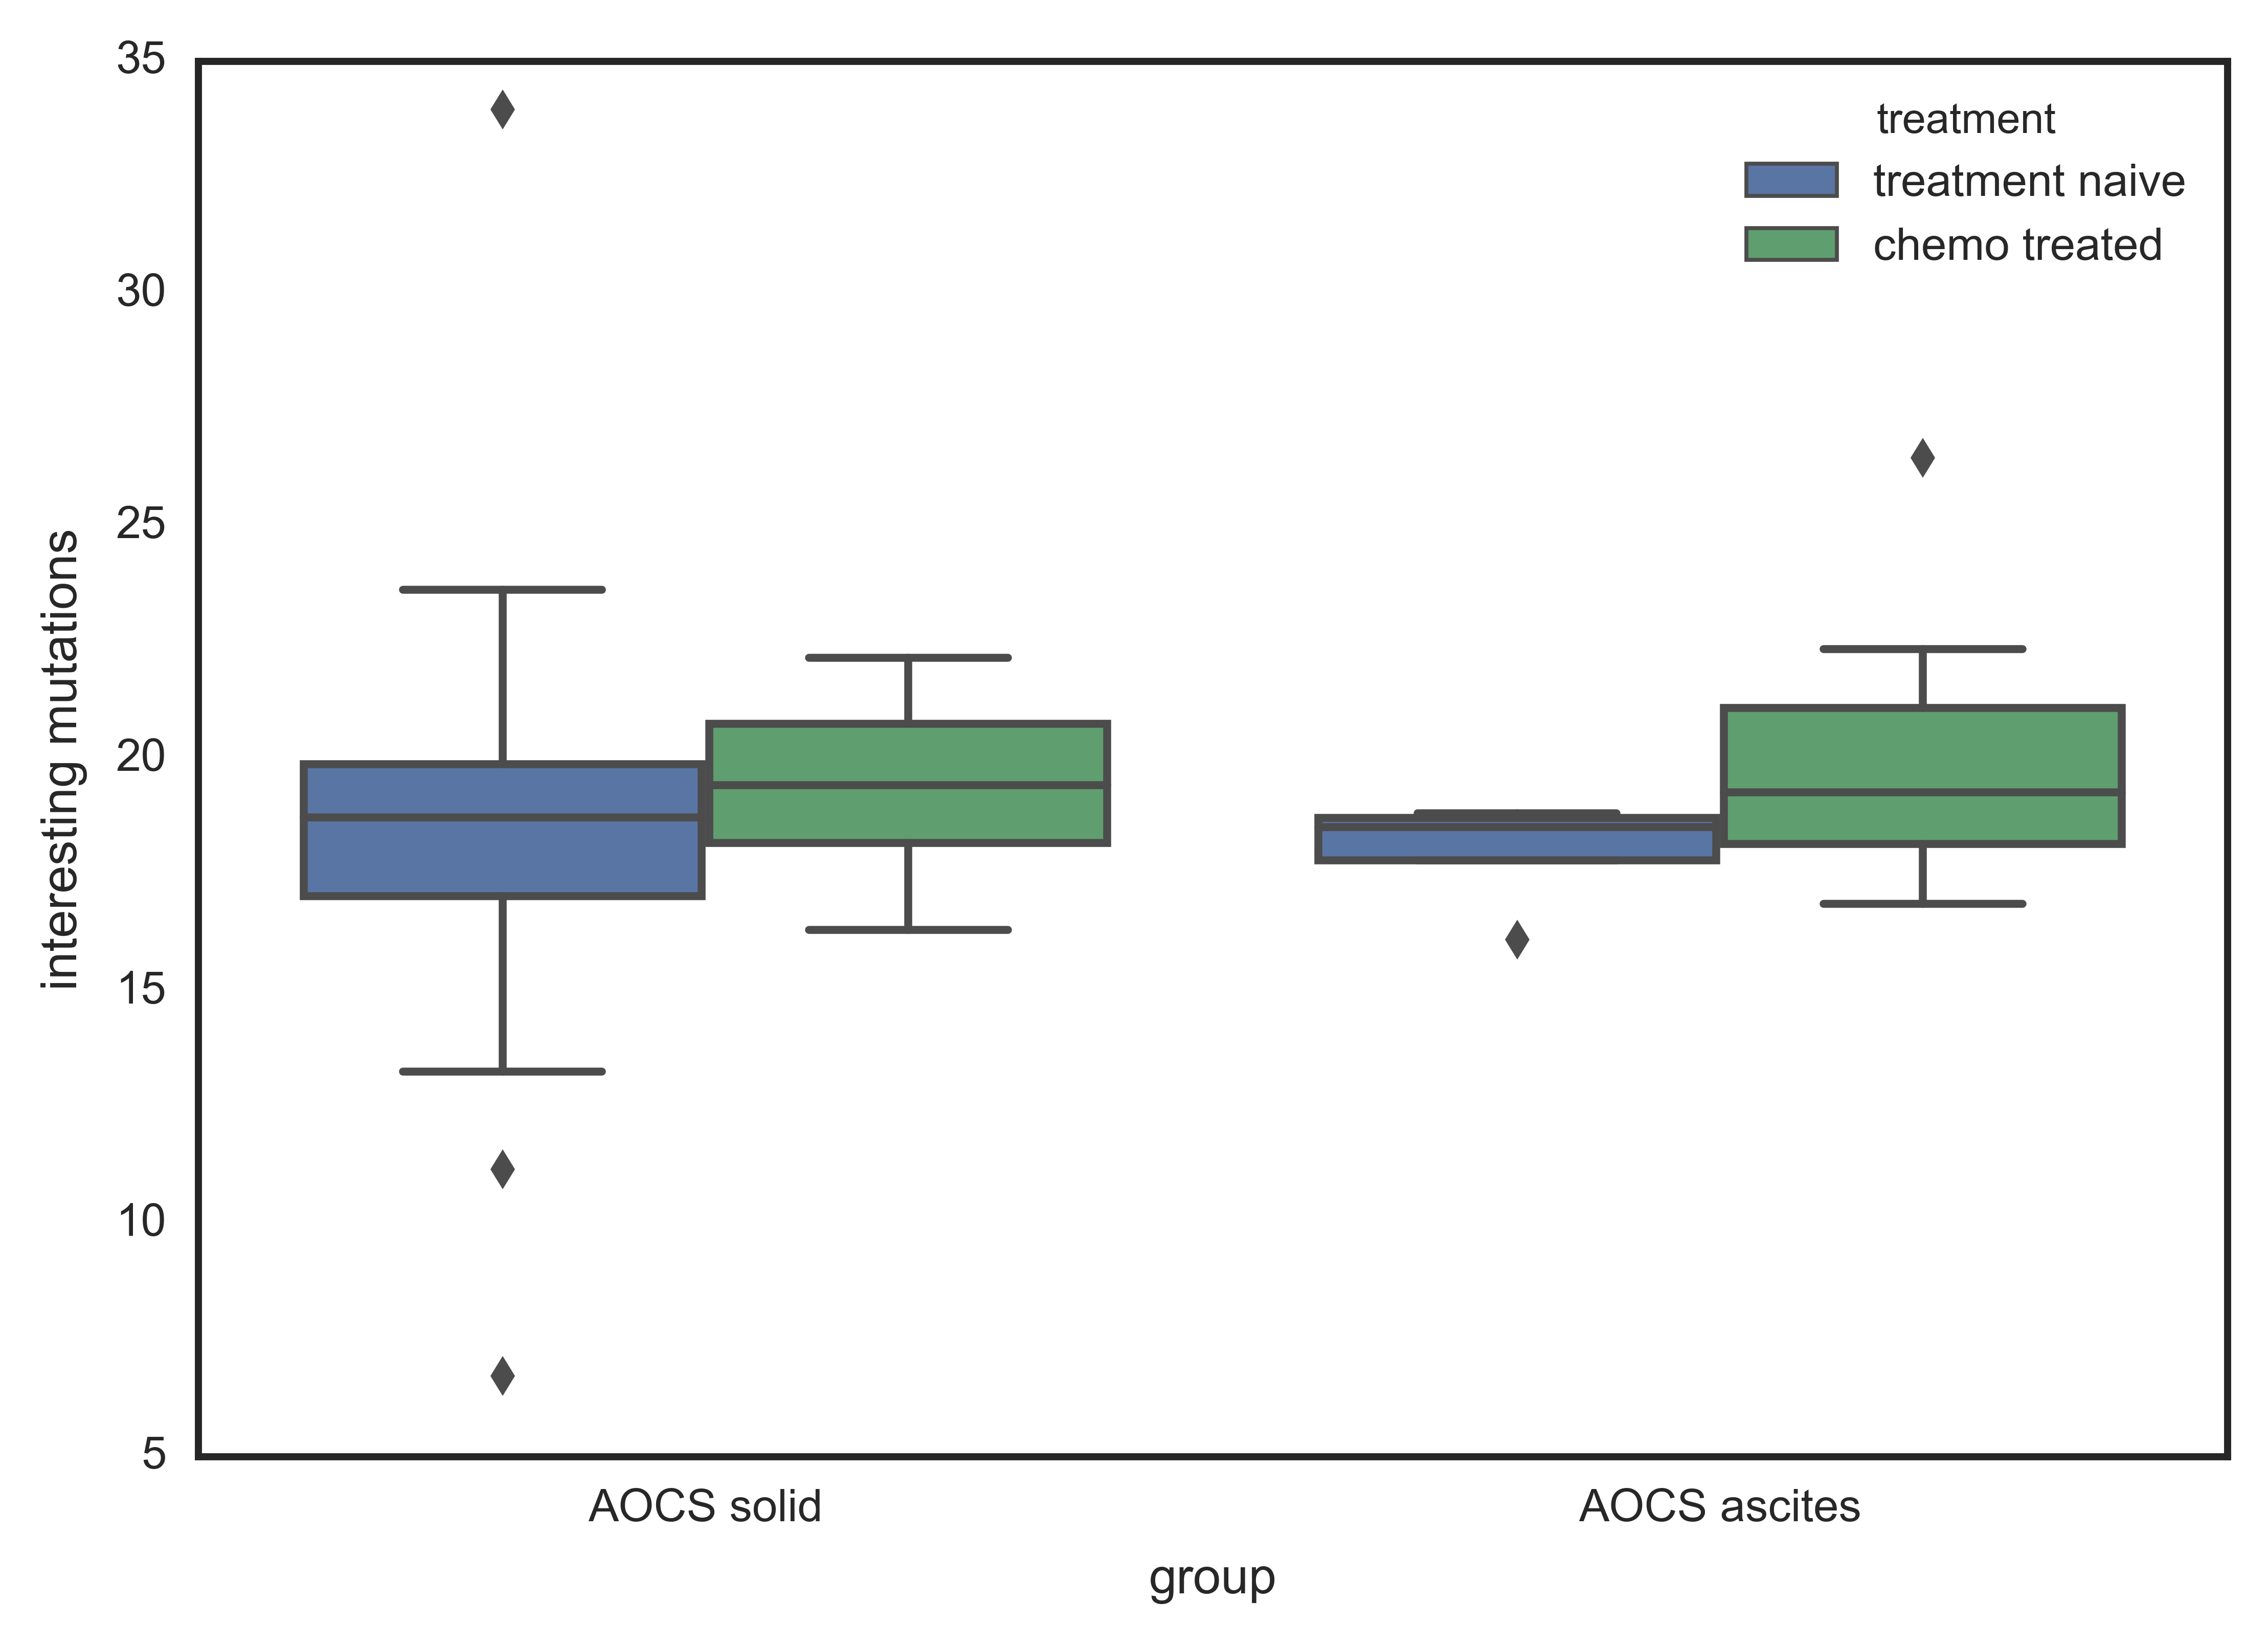

In [34]:
seaborn.boxplot(data=sources[sources.cohort == "AOCS"], x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [35]:
mutations.ix[mutations.binding_affinity > 0].shape

(8834, 45)

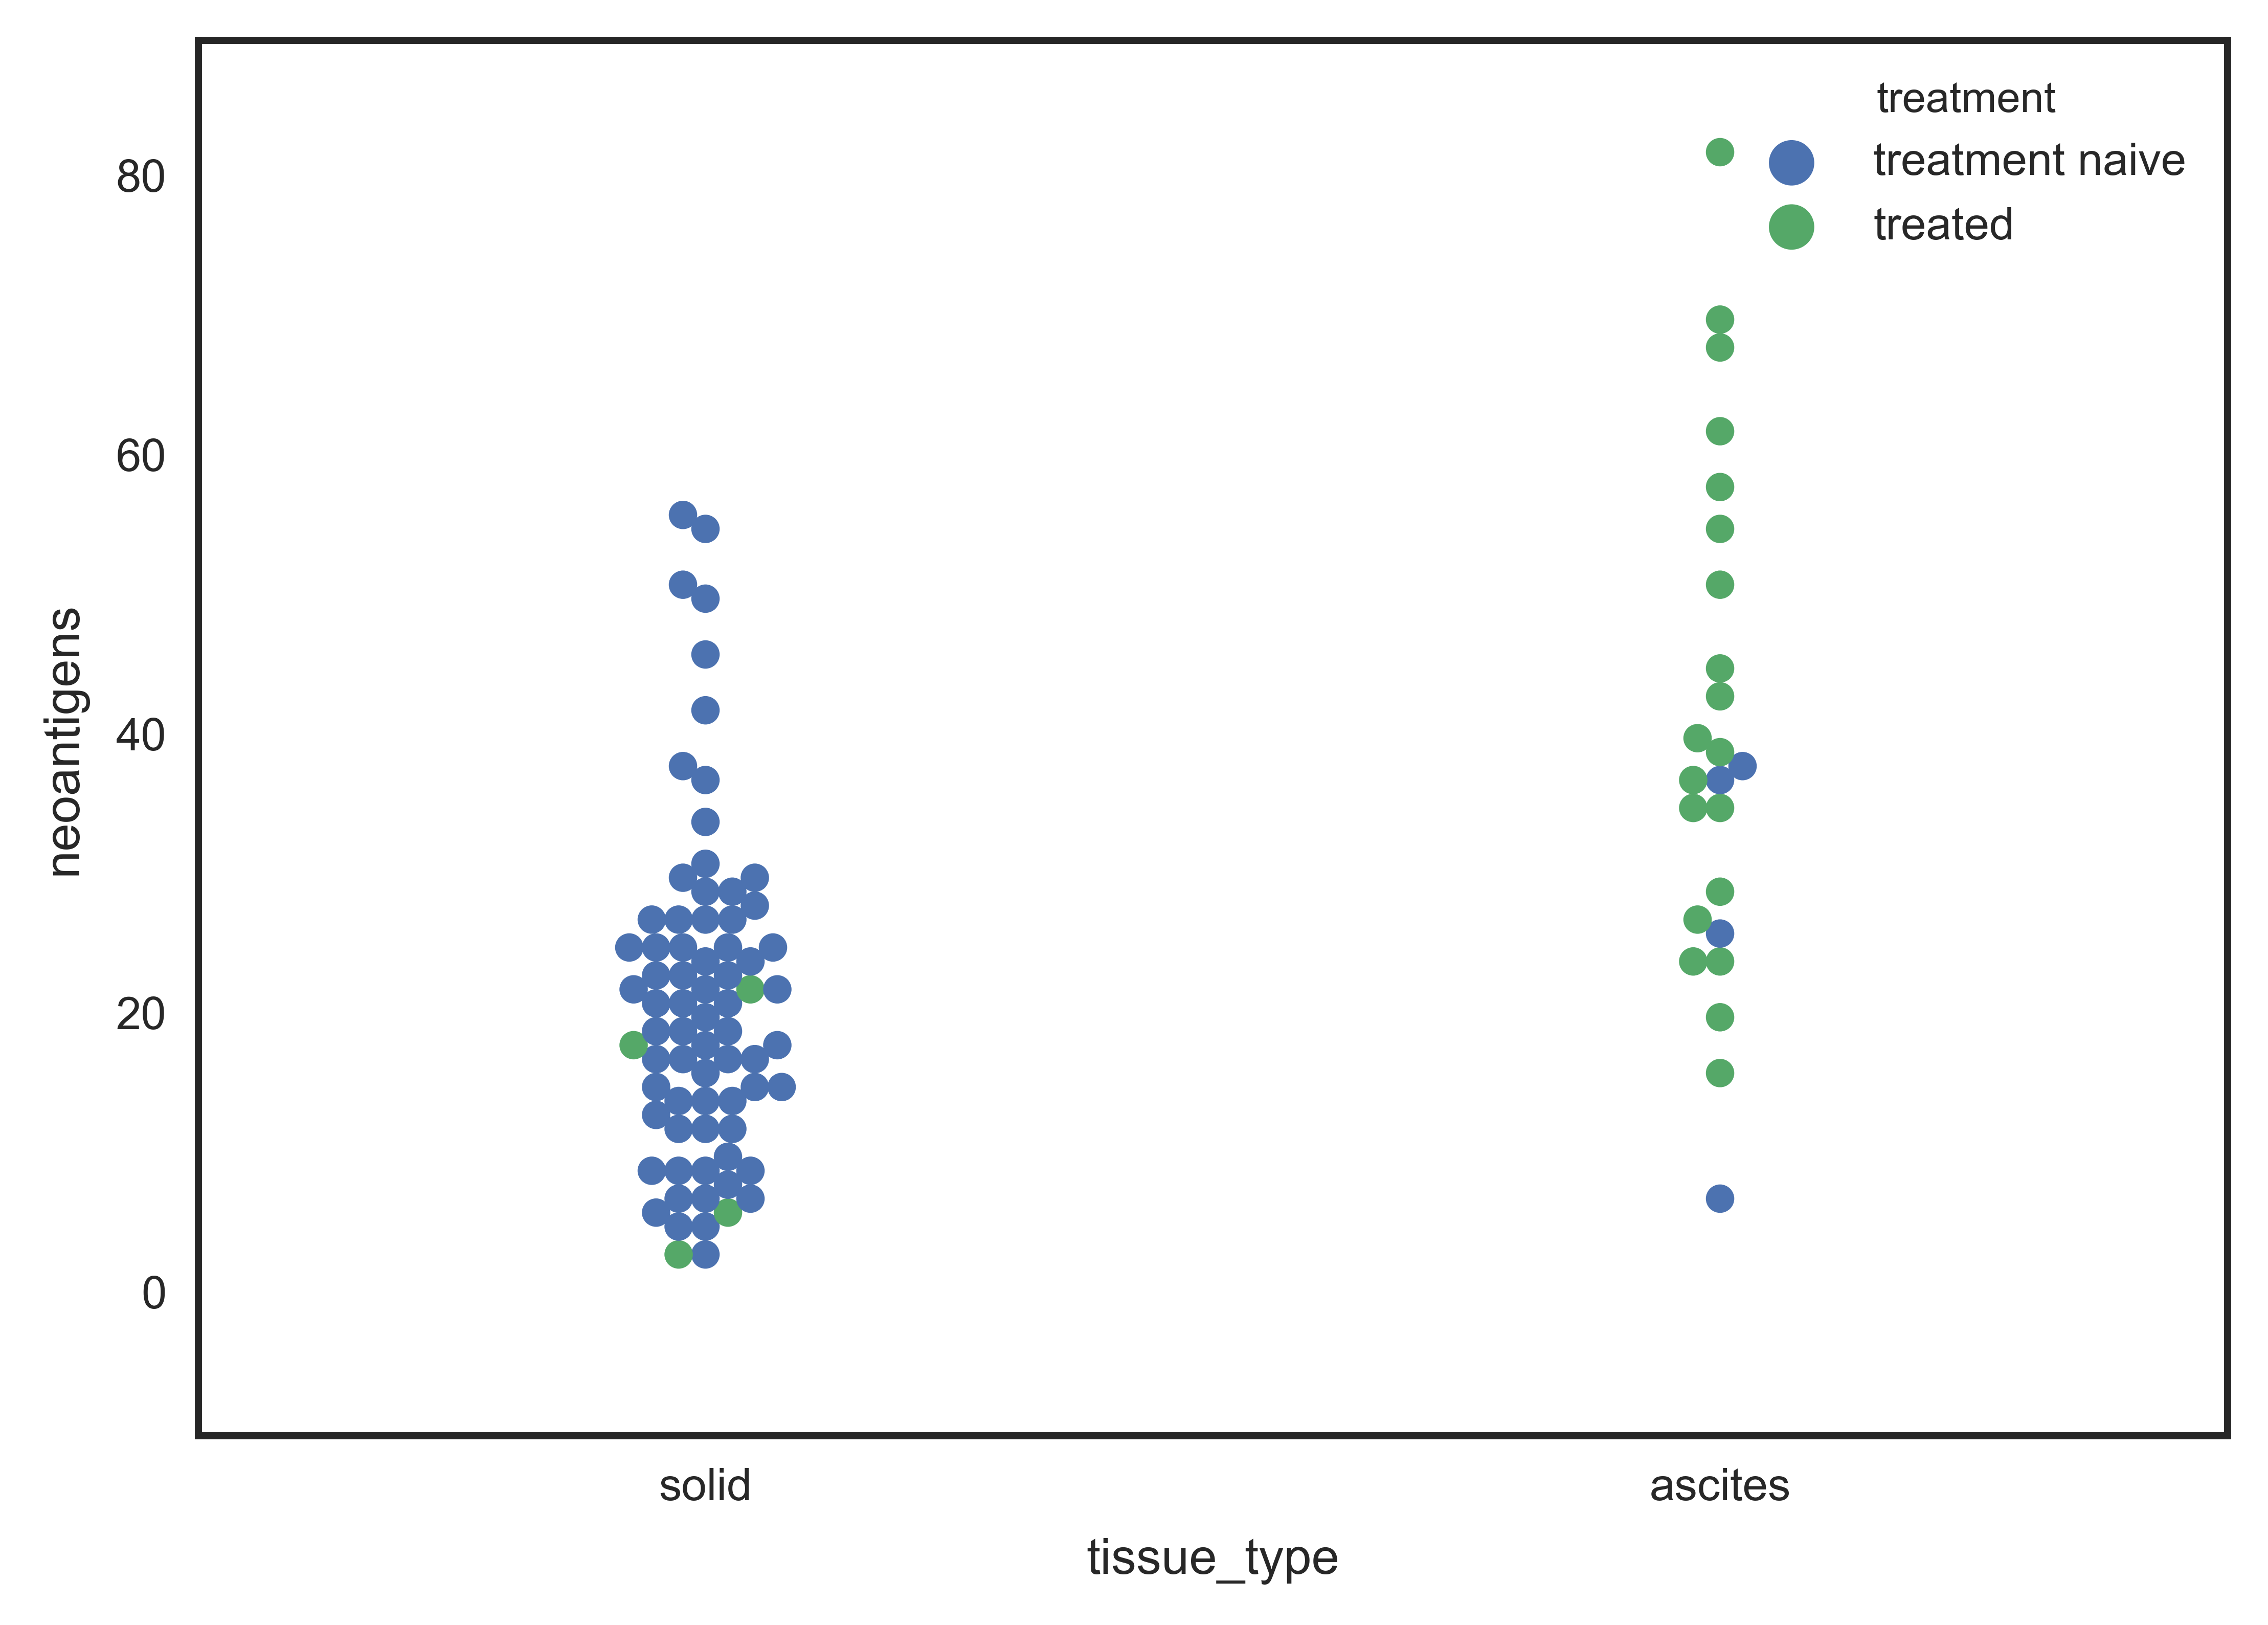

In [36]:
df = mutations.ix[~ mutations.rna_alt_reads.isnull()].ix[
    (
        (mutations.called == 1) |
        (
            (mutations.dna_alt_reads > 10)
        )
    )
    & mutations.binder
    & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame().reset_index()
df.index = df.source_id
#del df["source_id"]
df.columns = ["source_id", "neoantigens"]
df["donor"] = sources.donor[df.index]
df["treated"] = sources.treated[df.index]
df["treatment"] = df.treated.map({True: "treated", False: "treatment naive"})
df["tissue_type"] = sources.tissue_type[df.index]

seaborn.set_context('paper')
#seaborn.boxplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")
seaborn.swarmplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")


In [37]:
def source_display_name(name):
    return name

def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))
    
source_display_name = abbreviated_source_display_name

def series_signficance(series):    
    df = series.to_frame()
    (col,) = df.columns
    df["donor"] = sources.donor[df.index]
    df["treated"] = sources.treated[df.index]
    grouped = df.dropna().groupby(["donor", "treated"]).median().unstack().dropna()
    grouped["compare"] = (grouped[(col, False)] < grouped[(col, True)])
    
    counts = grouped["compare"].value_counts()
    print("Treated > untreated in %d of %d, p=%f. Mean change: %s absolute, percent: %s" % (
            counts.get(True, 0),
            counts.sum(),
            scipy.stats.binom_test([counts.get(True, 0), counts.get(False, 0)]),
            mean_with_errorbars(grouped[(col, True)] - grouped[(col, False)]),
            mean_with_errorbars(grouped[(col, True)] * 100.0 / grouped[(col, False)])
        ))
    counts
    
def plot_series(series, only_multiple=True, color_column='timepoint', use_hatch=False, figsize=(18,5), order='donor', legend_loc='upper right', legend=True, legend_bbox_to_anchor=None):
    if isinstance(series.tolist()[0], (list, numpy.ndarray)) and series.tolist()[0][0] in (True, False):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.mean(x) - numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
                ("high", [numpy.mean(x) + numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
        ]), index=series.index)
        df = df * 100.0
    elif isinstance(series.tolist()[0], (list, numpy.ndarray)):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.percentile(x, 5) for x in series]),
                ("high", [numpy.percentile(x, 95) for x in series]),
        ]), index=series.index)
    else:
        df = pandas.DataFrame({"value": series}, index=series.index)
    
    series_signficance(df.value)
    
    if order == 'donor':
        def sort_key(source):
            return (sources.ix[source].donor, sources.ix[source].interval_days, sources.ix[source].treated)
    elif order == 'num_sources':
         def sort_key(source):
            donor = sources.ix[source].donor
            num_treated = len([s for s in sources.index if sources.ix[s].donor == donor and sources.ix[s].treated])
            num_sources = len([s for s in sources.index if sources.ix[s].donor == donor])
            return (num_treated * -1, num_sources * -1, donor, sources.ix[source].interval_days, sources.ix[source].treated)
    else:
        raise ValueError("Unknown ordering %s" % order)
            
    sources_ordered = sorted(df.index.tolist(), key=sort_key)
    if only_multiple:
        sources_ordered = [
            s for s in sources_ordered if len(set(
                [sources.ix[other_source].treated for other_source in sources.ix[sources_ordered].ix[sources.donor == sources.ix[s].donor].index])) > 1
        ]
    
    df = df.ix[sources_ordered]

    adjacent_space = 0
    minor_space = 0
    major_space = 2
    bar_width = 2

    colors = []
    
    def color_and_hatch(info):
        color = None
        hatch = None
        primary_like = None
        if color_column == 'timepoint':
            primary_like = info['timepoint'] == "primary"    
        elif color_column == 'treated':
            primary_like = not info['treated']
        else:
            assert False
        
        if use_hatch:
            primary_color = seaborn.color_palette("deep")[0]
            recurrence_color = seaborn.color_palette("deep")[1]
            hatch = '/' if info['tissue_type'] == 'ascites' else None
            color = primary_color if primary_like else recurrence_color
        else:
            primary_colors = seaborn.color_palette("Blues")
            recurrence_colors = seaborn.color_palette("Greens")
            index = 3 if info['tissue_type'] == 'ascites' else -1
            color = (primary_colors if primary_like else recurrence_colors)[index]
        return (color, hatch)


    for source in sources_ordered:
        colors.append(color_and_hatch(sources.ix[source])[0])

    x_values = [bar_width]
    for (prev_source_i, source) in enumerate(sources_ordered[1:]):
        prev_source = sources_ordered[prev_source_i]
        x_increment = None
        if sources.ix[prev_source].donor != sources.ix[source].donor:
            x_increment = major_space
        elif sources.ix[prev_source].interval_days != sources.ix[source].interval_days:
            x_increment = minor_space
        else:
            x_increment = adjacent_space
        x_values.append(x_values[-1] + bar_width + x_increment)
    x_values = numpy.array(x_values)

    #seaborn.set_context("talk")
    #pyplot.figure(figsize=figsize)
    bars = pyplot.bar(
        x_values,
        df.value,
        bar_width,
        yerr=[df.value - df.low, df.high - df.value] if 'low' in df else None,
        error_kw={
            'ecolor': 'black',
            'capsize': 3,
            'elinewidth': 4
        },
        color = colors)
    for (bar, source) in zip(bars, sources_ordered):
        hatch = color_and_hatch(sources.ix[source])[1]
        if hatch is not None:
            bar.set_hatch(hatch)

    ax = pyplot.gca()
    pyplot.xticks(x_values + bar_width / 2, [source_display_name(s) for s in sources_ordered], rotation="vertical", fontsize=6)
    #pyplot.xticks(x_values + bar_width / 2, ["" for s in sources_ordered], rotation="vertical")
    pyplot.grid(False)
    ax.yaxis.grid(True, color='gray', linewidth=0.5)
    ax.patch.set_facecolor("None")
    pyplot.xlim(xmin=0, xmax=x_values.max() + bar_width + 5)

    #dummies = [ax.plot([], [], ls='-', c=c)[0] for c in color_map.values()]
    #ax.legend(dummies, [" ".join(tpl) for tpl in color_map], fontsize='xx-large', ncol=2)

    if legend:
        class CustomLegend(object):
            def __init__(self, color, hatch=None):
                self.color = color
                self.hatch = hatch

            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = matplotlib.patches.Rectangle([x0, y0], width, height, facecolor=self.color,
                                           edgecolor=None, hatch=self.hatch, lw=0,
                                           transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch

        class PrimarySolidLegend(object):
            label = "primary solid" if color_column == 'timepoint' else "untreated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'solid'}))

        class RecurrenceSolidLegend(object):
            label = "recurrence solid" if color_column == 'timepoint' else "treated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'solid'}))

        class PrimaryAscitesLegend(object):
            label = "primary ascites" if color_column == 'timepoint' else "untreated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'ascites'}))

        class RecurrenceAscitesLegend(object):
            label = "recurrence ascites" if color_column == 'timepoint' else "treated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'ascites'}))

        legend_classes = [PrimarySolidLegend(), PrimaryAscitesLegend(), RecurrenceSolidLegend(), RecurrenceAscitesLegend()]


        leg = pyplot.legend(legend_classes, [x.label for x in legend_classes],
                      handler_map = dict((c, c.handler) for c in legend_classes),
                      bbox_to_anchor=legend_bbox_to_anchor,
                      fontsize=6,
                      loc=legend_loc, ncol=4)
        leg.set_frame_on(True)

#series = mutations_any_alt_reads.groupby("source_id")["donor"].count()
#plot_series(series, use_hatch=False)


Treated > untreated in 11 of 12, p=0.006348. Mean change: 2 (1-2) absolute, percent: 161 (140-190)
Treated > untreated in 10 of 12, p=0.038574. Mean change: 67 (13-120) absolute, percent: 136 (120-160)
Treated > untreated in 8 of 11, p=0.226563. Mean change: 46 (4-89) absolute, percent: 179 (130-240)


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


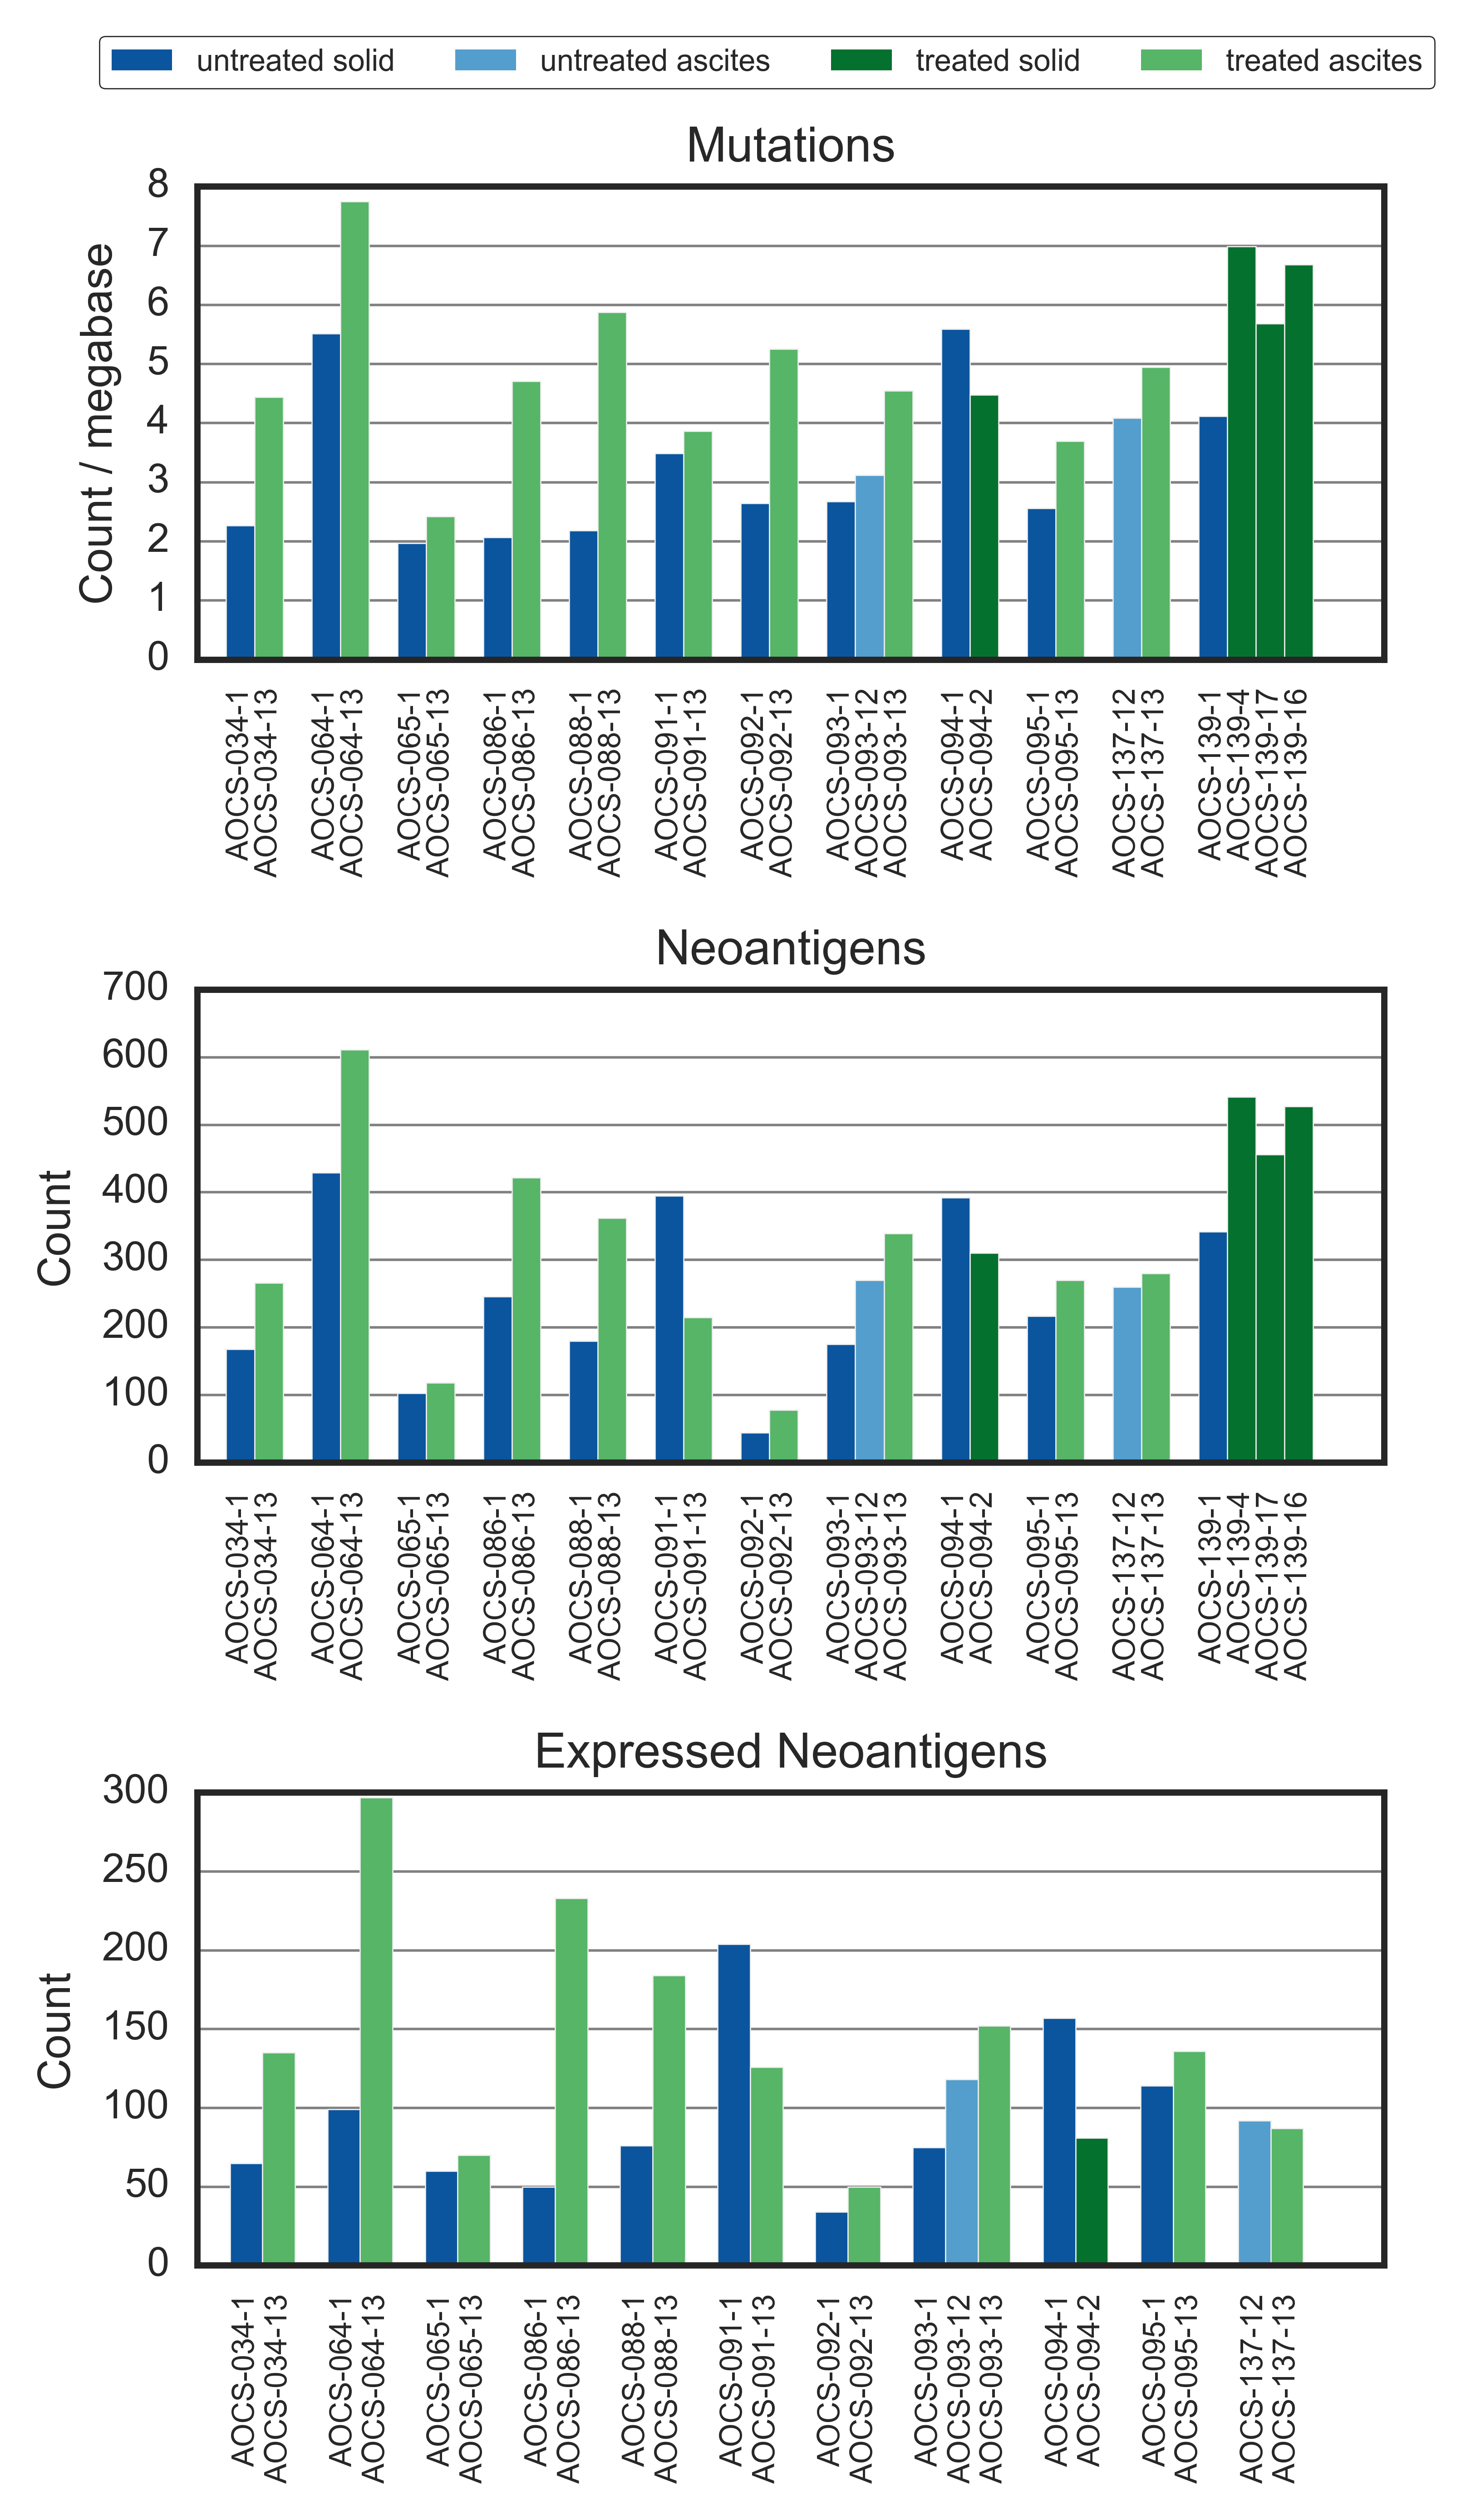

In [38]:
seaborn.set_context('paper')
seaborn.set_style('white')

## Paired analyses
#sub_sources = sources.ix[sources.timepoint_paired]
sub_sources = sources.copy()

fig = pyplot.figure(figsize=(4,7))
seaborn.set_context('paper')

grid=(3,1)

ax = pyplot.subplot2grid(grid,(0, 0))
plot_series(
    sub_sources.mutations_per_mb.dropna(),
    color_column='treated',
    legend_loc="upper center",
    legend_bbox_to_anchor=(0.48,1.35),
)
pyplot.title("Mutations")
pyplot.ylabel("Count / megabase")
#pyplot.setp( ax.get_xticklabels(), visible=False)
pyplot.subplots_adjust(top=0.25)

ax = pyplot.subplot2grid(grid,(1, 0))
plot_series(sub_sources.peptides.dropna(), color_column='treated', legend=False)
pyplot.title("Neoantigens")
pyplot.ylabel("Count")


ax = pyplot.subplot2grid(grid,(2, 0), sharey=None)
plot_series(sub_sources["expressed peptides"].dropna(),
            color_column='treated',
            legend=False,
)
pyplot.title("Expressed Neoantigens")
pyplot.ylabel("Count")

pyplot.tight_layout()

pyplot.savefig("../figures/paired_counts.pdf", rect=(0, 0, 1, 1.5))


In [39]:
df.groupby(["tissue_type", "treatment"])["neoantigens"].mean()
df.groupby(["tissue_type", "treatment"])["source_id"].unique()

tissue_type  treatment      
ascites      treated            [AOCS-034-13/SP101524, AOCS-064-13/SP101554, A...
             treatment naive    [AOCS-093-12/SP101636, AOCS-137-12/SP101866, A...
solid        treated            [AOCS-077-1/SP101572, AOCS-094-2/SP106641, AOC...
             treatment naive    [AOCS-001-1/SP101515, AOCS-004-1/SP101519, AOC...
Name: source_id, dtype: object

In [40]:
# Shared peptides
expressed_peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident[muts_confident.rna_alt_reads > 2].iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            expressed_peptide_to_donor_to_index[peptide][row.donor] = i
    
len(expressed_peptide_to_donor_to_index)

6833

In [53]:
26 * 100. / 18336

0.1417975567190227

In [42]:
# STATEMENT_NEOANTIGENS1
# Shared peptides
peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident.iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            peptide_to_donor_to_index[peptide][row.donor] = i
    
len(peptide_to_donor_to_index)

18336

In [43]:
repeat_peptides = sorted(set(x for (x, donors) in peptide_to_donor_to_index.items() if len(donors) > 1))
len(repeat_peptides)

26

In [44]:
len(repeat_peptides) * 100.0 / len(peptide_to_donor_to_index)

0.1417975567190227

In [45]:
df = pandas.DataFrame({
        'peptide': repeat_peptides,
        'donors': [" ".join(peptide_to_donor_to_index[peptide]) for peptide in repeat_peptides],
        'indices': [
            list(itertools.chain(peptide_to_donor_to_index[peptide].values()))
            for peptide in repeat_peptides
        ]})
df["effects"] = [
    [muts_confident.ix[index].effect for index in row.indices]
    for (i, row) in df.iterrows()
]
df["genes"] = [
    [muts_confident.ix[index].gene for index in row.indices]
    for (i, row) in df.iterrows()
]
pandas.set_option('display.width', 1000)

print_full(df[["peptide", "genes", "effects"]])
df[["peptide", "donors", "genes", "effects"]]

        peptide                       genes                      effects
0   AAAAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
1    AAAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
2     AAAAAAASA         [SKIDA1, DHFR MSH3]        [p.A317S, p.61insSAP]
3     ALFVTWSTM            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
4      CPTTPAPL                [TP53, TP53]         [p.R249fs, p.T304fs]
5      CVFSLLAI  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
6     FVTWSTMEF            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
7     HWMENISPF                [TP53, TP53]         [p.R249fs, p.T304fs]
8    ITLSACVFSL  [DNMT1 S1PR2, DNMT1 S1PR2]           [p.S119C, p.S119C]
9    LFVTWSTMEF            [MT-ND5, MT-ND5]           [p.I100T, p.I100T]
10  LLGRNSFEVHV                [TP53, TP53]           [p.R273H, p.R273H]
11  LPRKPTRAATV                [TP53, TP53]           [p.A86fs, p.S96fs]
12   LPSQRRNHWM                [TP53, TP53]        

,peptide,donors,genes,effects
0,AAAAAAAAASA,AOCS-116 AOCS-168,"[SKIDA1, DHFR MSH3]","[p.A317S, p.61insSAP]"
1,AAAAAAAASA,AOCS-116 AOCS-168,"[SKIDA1, DHFR MSH3]","[p.A317S, p.61insSAP]"
2,AAAAAAASA,AOCS-116 AOCS-168,"[SKIDA1, DHFR MSH3]","[p.A317S, p.61insSAP]"
3,ALFVTWSTM,AOCS-115 AOCS-168,"[MT-ND5, MT-ND5]","[p.I100T, p.I100T]"
4,CPTTPAPL,AOCS-157 AOCS-064,"[TP53, TP53]","[p.R249fs, p.T304fs]"
5,CVFSLLAI,AOCS-166 AOCS-135,"[DNMT1 S1PR2, DNMT1 S1PR2]","[p.S119C, p.S119C]"
6,FVTWSTMEF,AOCS-115 AOCS-168,"[MT-ND5, MT-ND5]","[p.I100T, p.I100T]"
7,HWMENISPF,AOCS-157 AOCS-064,"[TP53, TP53]","[p.R249fs, p.T304fs]"
8,ITLSACVFSL,AOCS-166 AOCS-135,"[DNMT1 S1PR2, DNMT1 S1PR2]","[p.S119C, p.S119C]"
9,LFVTWSTMEF,AOCS-115 AOCS-168,"[MT-ND5, MT-ND5]","[p.I100T, p.I100T]"


In [46]:
sum(['TP53' in x.genes and 'fs' in "".join(x.effects) for (_, x) in df.iterrows() ])

8

In [47]:
def mean_with_std(grouped_column, decimals=0):
    pattern = "%%0.%df" % decimals
    return [
        (pattern + " +/ " + pattern) % (m, s) if not pandas.isnull(s) else pattern % m
        for (m, s) in zip(grouped_column.mean(), grouped_column.std())
    ]

def means_with_errorbars(grouped_column, decimals=0, plusminus=False):
    index = []
    values = []
    for (i, grouped) in grouped_column:
        index.append(i)
        values.append(mean_with_errorbars(grouped, decimals=decimals, plusminus=plusminus))
    return pandas.Series(values, index=index)
    
samples_with_rna = mutations.source_id.ix[mutations.rna_total_reads > 0].unique()

grouping_columns = ["cohort", "library", "tissue_type", "treated"]
grouped = sources.groupby(grouping_columns)

df = grouped.donor.nunique().to_frame() #.reset_index()
df["samples"] = grouped.donor.count().to_frame()["donor"]
df["samples with RNA"] = sources.ix[sources.index.isin(samples_with_rna)].groupby(grouping_columns).donor.count().to_frame()["donor"]
df["Mutations"] = means_with_errorbars(grouped.mutations, plusminus=True)
#df["C(C>A)C percent"] = means_with_errorbars(grouped["interesting mutations"], decimals=2)
#df["Protein changing"] = means_with_errorbars(grouped["protein changing"])
df["Neoantigens"] = means_with_errorbars(grouped.peptides, plusminus=True)
df["Expressed"] = means_with_errorbars(grouped["expressed peptides"], plusminus=True)


df = df.reset_index()
df["treated"] = df.treated.map({False: "untreated", True: "post-treatment"})
df["samples"] = ["%d (%d)" % (row.samples, row["samples with RNA"]) for (i, row) in df.iterrows()]
del df["samples with RNA"]
df = df.rename(columns={
        "donor": "donors",
        "treated": "treatment",
        "samples": "samples (RNA)",
        "tissue_type": "tissue type",
    })

#df.to_csv("../data/cohort.csv")
del df["cohort"]
del df["library"]
df.index = ["%s %s" % (row["tissue type"], row["treatment"]) for (i, row) in df.iterrows()]
del df["tissue type"]
del df["treatment"]
del df["donors"]
df = df.applymap(str)
df
print(df.to_latex(index=True, index_names=False, escape=False))
df

\begin{tabular}{lllll}
\toprule
{} & samples (RNA) &         Mutations &   Neoantigens &     Expressed \\
\midrule
ascites untreated      &         4 (4) &  10148 $\pm$ 1000 &  199 $\pm$ 60 &   78 $\pm$ 30 \\
ascites post-treatment &       24 (20) &  13428 $\pm$ 1000 &  295 $\pm$ 50 &  143 $\pm$ 30 \\
solid untreated        &       76 (70) &    7806 $\pm$ 900 &  152 $\pm$ 20 &    63 $\pm$ 9 \\
solid post-treatment   &        11 (4) &  11079 $\pm$ 3000 &  264 $\pm$ 90 &   38 $\pm$ 20 \\
\bottomrule
\end{tabular}



,samples (RNA),Mutations,Neoantigens,Expressed
ascites untreated,4 (4),10148 $\pm$ 1000,199 $\pm$ 60,78 $\pm$ 30
ascites post-treatment,24 (20),13428 $\pm$ 1000,295 $\pm$ 50,143 $\pm$ 30
solid untreated,76 (70),7806 $\pm$ 900,152 $\pm$ 20,63 $\pm$ 9
solid post-treatment,11 (4),11079 $\pm$ 3000,264 $\pm$ 90,38 $\pm$ 20


In [49]:
'''
def calculate(sub_df):
    return pandas.DataFrame({
        "mutations change":
            [sub_df.ix[sub_df.treated].mutations.mean() / sub_df.ix[~ sub_df.treated].mutations.mean()],
        "neoantigens change":
            [sub_df.ix[sub_df.treated].peptides.mean() / sub_df.ix[~ sub_df.treated].peptides.mean()],
        "expressed neoantigens change":
            [sub_df.ix[sub_df.treated]["expressed peptides"].mean() / sub_df.ix[~ sub_df.treated]["expressed peptides"].mean()],
    })

ascites_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "ascites"], calculate, "source_id")
print_full(ascites_change[0])

solid_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "solid"], calculate, "source_id")
print_full(solid_change[0])
'''

'\ndef calculate(sub_df):\n    return pandas.DataFrame({\n        "mutations change":\n            [sub_df.ix[sub_df.treated].mutations.mean() / sub_df.ix[~ sub_df.treated].mutations.mean()],\n        "neoantigens change":\n            [sub_df.ix[sub_df.treated].peptides.mean() / sub_df.ix[~ sub_df.treated].peptides.mean()],\n        "expressed neoantigens change":\n            [sub_df.ix[sub_df.treated]["expressed peptides"].mean() / sub_df.ix[~ sub_df.treated]["expressed peptides"].mean()],\n    })\n\nascites_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "ascites"], calculate, "source_id")\nprint_full(ascites_change[0])\n\nsolid_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "solid"], calculate, "source_id")\nprint_full(solid_change[0])\n'

In [50]:
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-001-1/SP101515,False,48,124,71,5818,1.938041,1,18.631832,AOCS solid,treatment naive,0.572581
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-002-1/SP101517,False,11,32,NaN,1520,0.506329,0,17.236842,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-004-1/SP101519,False,57,58,20,6670,2.221852,1,16.446777,AOCS solid,treatment naive,0.344828
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-005-1/SP101521,False,39,61,39,5643,1.879747,2,15.435052,AOCS solid,treatment naive,0.639344
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,AOCS-034-13/SP101524,True,122,266,135,13340,4.443704,5,17.376312,AOCS ascites,chemo treated,0.507519
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,AOCS-034-1/SP101523,True,73,168,65,6811,2.268821,4,17.970929,AOCS solid,treatment naive,0.386905
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-055-1/SP101526,False,114,177,91,14988,4.992672,0,11.182279,AOCS solid,treatment naive,0.514124
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-056-1/SP101528,False,56,150,16,7012,2.335776,1,20.593269,AOCS solid,treatment naive,0.106667
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,AOCS-057-1/SP101530,False,42,146,NaN,6070,2.021985,5,19.126853,AOCS solid,treatment naive,NaN


In [51]:
# Write out extended sources
icgc_specimens = pandas.read_table("../data/specimen.tsv", index_col="icgc_specimen_id")

sources_extended = sources.copy()
sources_extended.index = [s.split("/")[1] for s in sources_extended.index]
sources_extended = sources_extended.merge(icgc_specimens, left_index=True, right_index=True)
sources_extended = sources_extended.dropna('columns', how='all').reset_index("source_id")
sources_extended.to_csv("../data/sources.extended.csv")
sources_extended.index = sources_extended.source_id
del sources_extended["source_id"]
sources_extended

,index,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed,project_code,study_specimen_involved_in,submitted_specimen_id,icgc_donor_id,submitted_donor_id,specimen_type,specimen_type_other,specimen_interval,specimen_donor_treatment_type,specimen_donor_treatment_type_other,specimen_processing,specimen_storage,tumour_confirmed,tumour_histological_type,tumour_grading_system,tumour_grade,tumour_stage_system,tumour_stage,percentage_cellularity,level_of_cellularity
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,48,124,71,5818,1.938041,1,18.631832,AOCS solid,treatment naive,0.572581,OV-AU,PCAWG,AOCS-001-1,DO46325,AOCS-001,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,73,61-80%
AOCS-002-1/SP101517,SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,11,32,NaN,1520,0.506329,0,17.236842,AOCS solid,treatment naive,NaN,OV-AU,PCAWG,AOCS-002-1,DO46326,AOCS-002,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,2,FIGO,III,85,>81%
AOCS-004-1/SP101519,SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,57,58,20,6670,2.221852,1,16.446777,AOCS solid,treatment naive,0.344828,OV-AU,PCAWG,AOCS-004-1,DO46327,AOCS-004,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,77,61-80%
AOCS-005-1/SP101521,SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,39,61,39,5643,1.879747,2,15.435052,AOCS solid,treatment naive,0.639344,OV-AU,PCAWG,AOCS-005-1,DO46328,AOCS-005,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,90,>81%
AOCS-034-13/SP101524,SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True,122,266,135,13340,4.443704,5,17.376312,AOCS ascites,chemo treated,0.507519,OV-AU,NaN,AOCS-034-13,DO46329,AOCS-034,Recurrent tumour - other,recurrent ascitic fluid,1597,other therapy,Surgery and Chemotherapy,fresh,"frozen, vapor phase",no,8140/3,NaN,NaN,NaN,NaN,99,>81%
AOCS-034-1/SP101523,SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True,73,168,65,6811,2.268821,4,17.970929,AOCS solid,treatment naive,0.386905,OV-AU,PCAWG,AOCS-034-1,DO46329,AOCS-034,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8140/3,Silverberg,3,FIGO,III,84,>81%
AOCS-055-1/SP101526,SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,114,177,91,14988,4.992672,0,11.182279,AOCS solid,treatment naive,0.514124,OV-AU,PCAWG,AOCS-055-1,DO46330,AOCS-055,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,82,>81%
AOCS-056-1/SP101528,SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,56,150,16,7012,2.335776,1,20.593269,AOCS solid,treatment naive,0.106667,OV-AU,PCAWG,AOCS-056-1,DO46331,AOCS-056,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,NaN,2,FIGO,III,94,>81%
AOCS-057-1/SP101530,SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,42,146,NaN,6070,2.021985,5,19.126853,AOCS solid,treatment naive,NaN,OV-AU,PCAWG,AOCS-057-1,DO46332,AOCS-057,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,68,61-80%


In [52]:
sources_extended[pandas.isnull(sources_extended.mutations)]
sources[pandas.isnull(sources.mutations)]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,source_id,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,,
